In [1]:
import os
os.chdir("../")
with open('run/settings.py', 'r') as file:
    exec(file.read())

Random seed set to 333
using device:  cpu


# Configuration (customizable)

In [2]:
overwrite = False
with open('run/configs/synthetic_w_gt.py', 'r') as file:
    exec(file.read())
    
update_config(model_name = 'syn_gt_at_resdiff')
config_dict = get_config_dict()

# Data

In [3]:
# change data preparation for a given experiment
with open('run/prepare_datasets/synthetic.py', 'r') as file:
    exec(file.read())
# prepare model inputs
with open('run/inputs.py', 'r') as file:
    exec(file.read())

{'No trend.': (210, 60, 30), 'The time series shows upward linear trend.': (210, 60, 30), 'The time series shows downward linear trend.': (210, 60, 30), 'The time series shows upward quadratic trend.': (210, 60, 30), 'The time series shows downward quadratic trend.': (210, 60, 30), 'No seasonal pattern.': (210, 60, 30), 'The time series exhibits a seasonal pattern.': (210, 60, 30), 'No sharp shifts.': (210, 60, 30), 'The mean of the time series shifts upwards.': (210, 60, 30), 'The mean of the time series shifts downwards.': (210, 60, 30), 'The time series exhibits low variability.': (210, 60, 30), 'The time series exhibits high variability.': (210, 60, 30)}


final distribution of text prediction
text
No trend. No seasonal pattern. No sharp shifts. The time series exhibits low variability.                                                                                                210
No trend. No seasonal pattern. No sharp shifts. The time series exhibits high variability.         

# Model (customizable)

In [4]:

ts_decoder = ResAttDiffDecoder(ts_dim=ts_f_dim.shape[1], 
                                output_dim=config_dict['embedded_dim'],
                                nhead = 8,
                                num_layers = 3,
                                dim_feedforward= 768,
                                diff_txt_proj = True).to(device)
with open('run/model.py', 'r') as file:
    exec(file.read())


Layer (type:depth-idx)                                                 Param #
VITAL                                                                  --
├─TSEncoder: 1-1                                                       --
│    └─LocalNorm: 2-1                                                  --
│    └─MultiCNNEncoder: 2-2                                            768
│    │    └─ModuleList: 3-1                                            3,691,408
│    │    └─MultiheadAttention: 3-2                                    2,362,368
│    │    └─LayerNorm: 3-3                                             1,536
├─TextEncoder: 1-2                                                     --
│    └─TextEncoderAttention: 2-3                                       768
│    │    └─MultiheadAttention: 3-4                                    2,362,368
│    │    └─Linear: 3-5                                                590,592
│    │    └─GELU: 3-6                                                  --
│ 

# Train

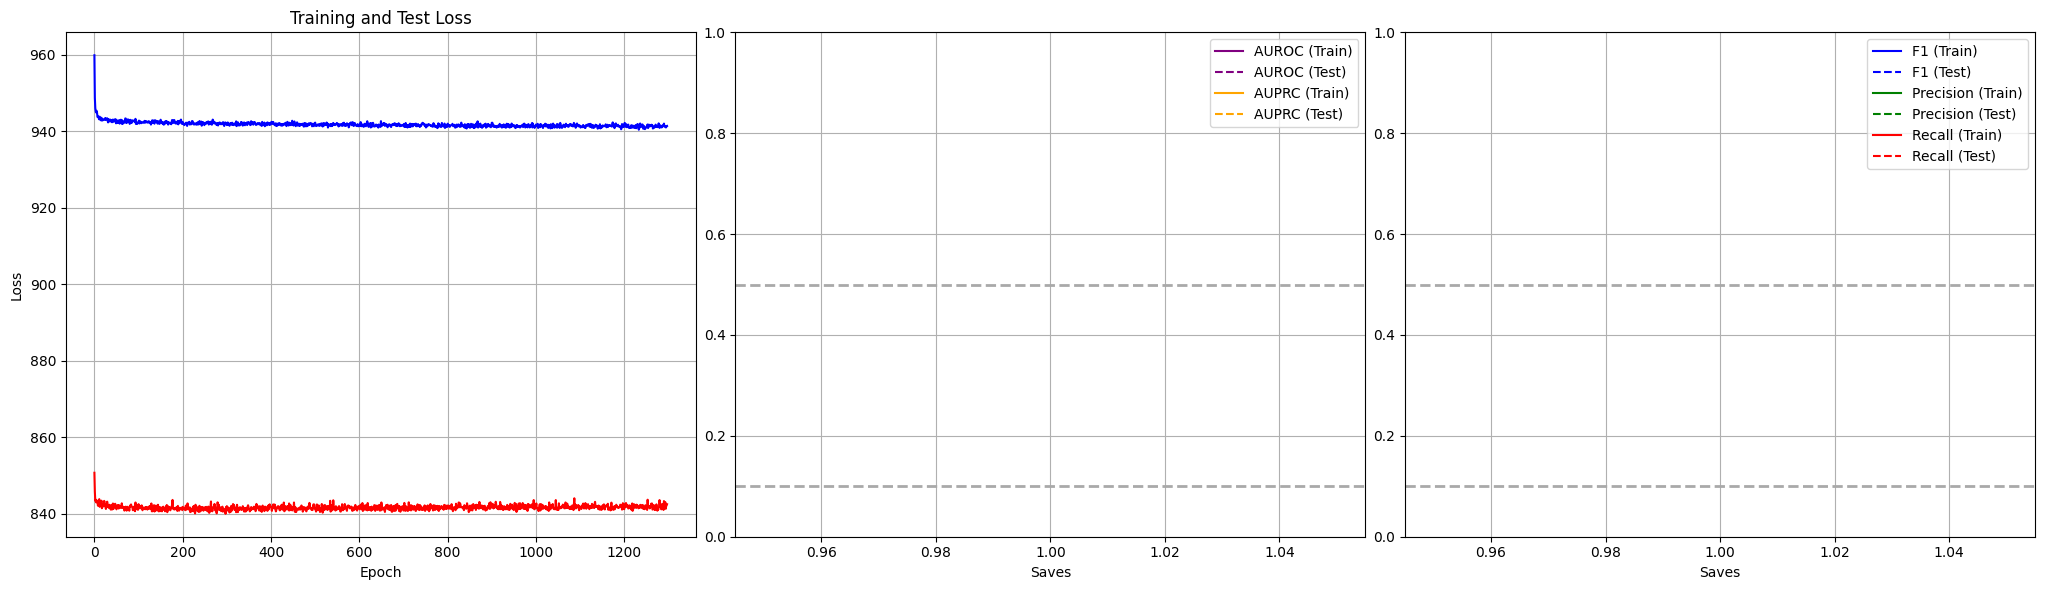

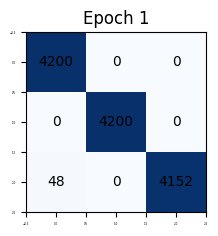

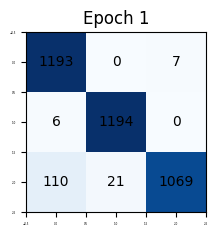

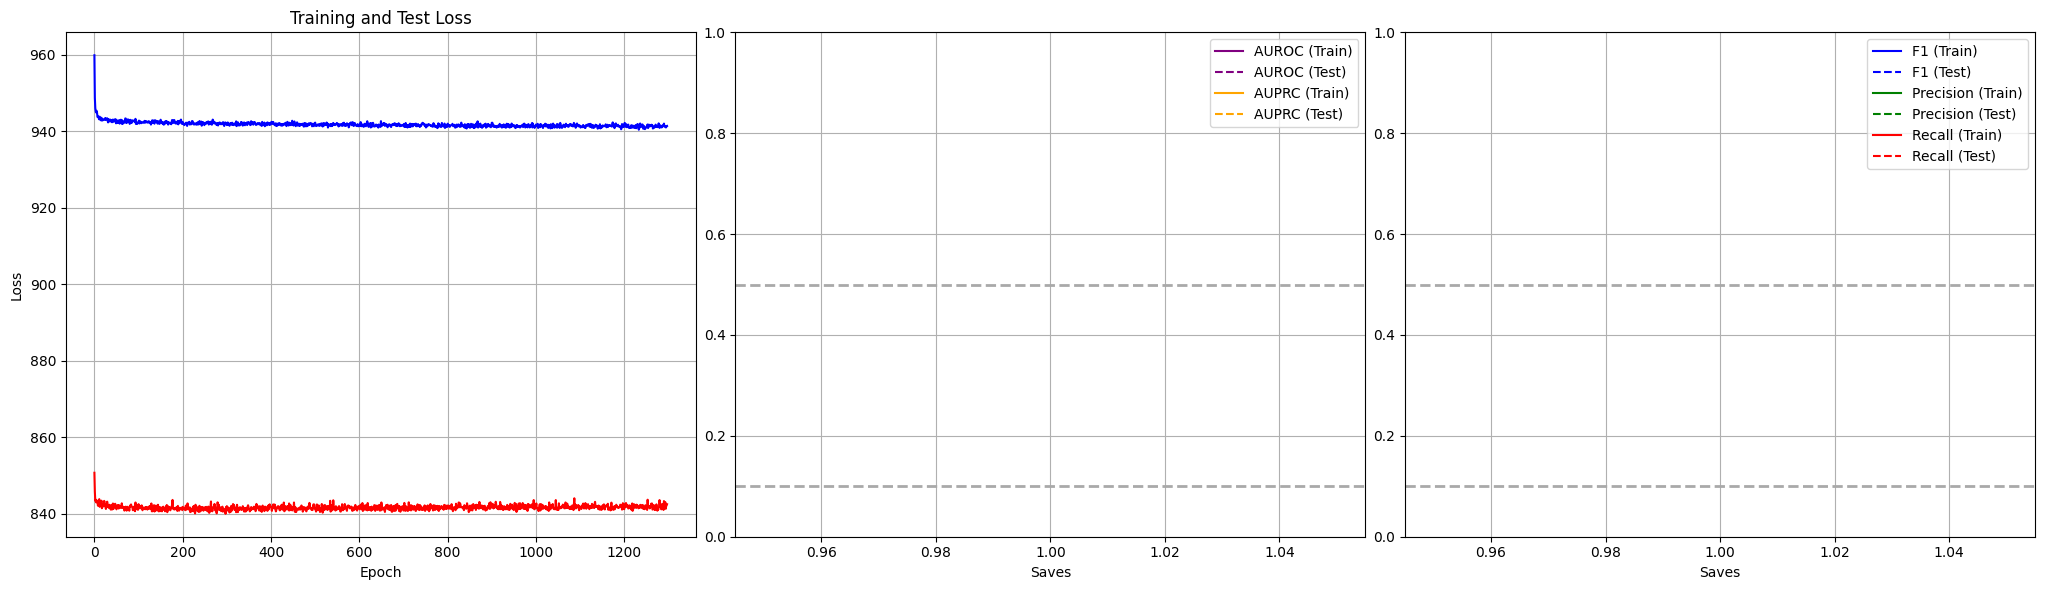

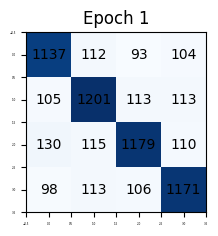

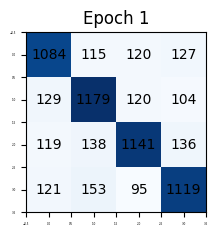

KeyboardInterrupt: 

In [5]:
with open('run/train.py', 'r') as file:
    exec(file.read())


# Generation

100    No trend.
Name: segment1, dtype: object


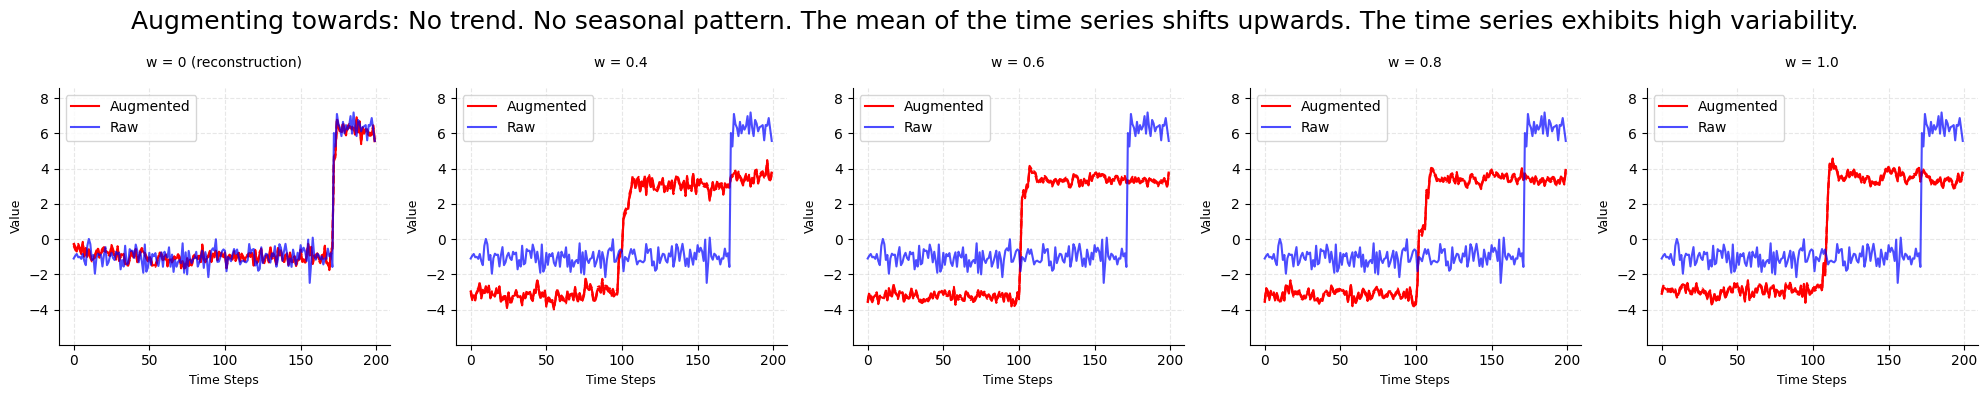

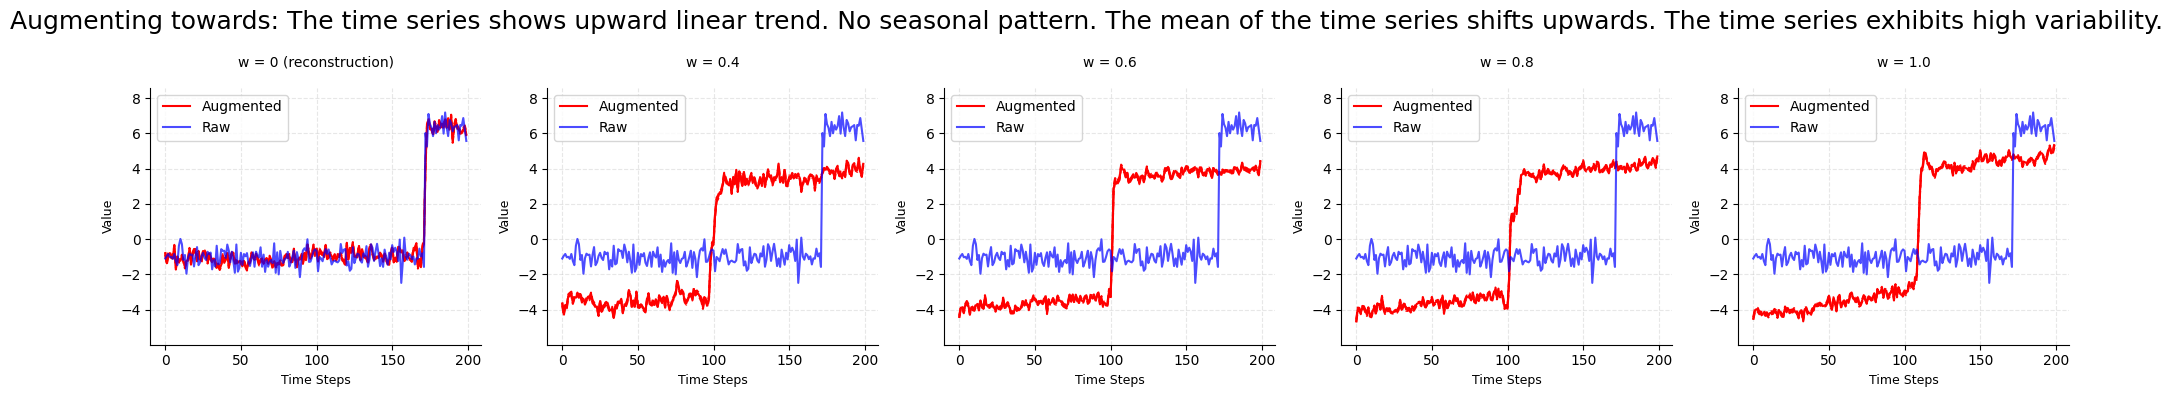

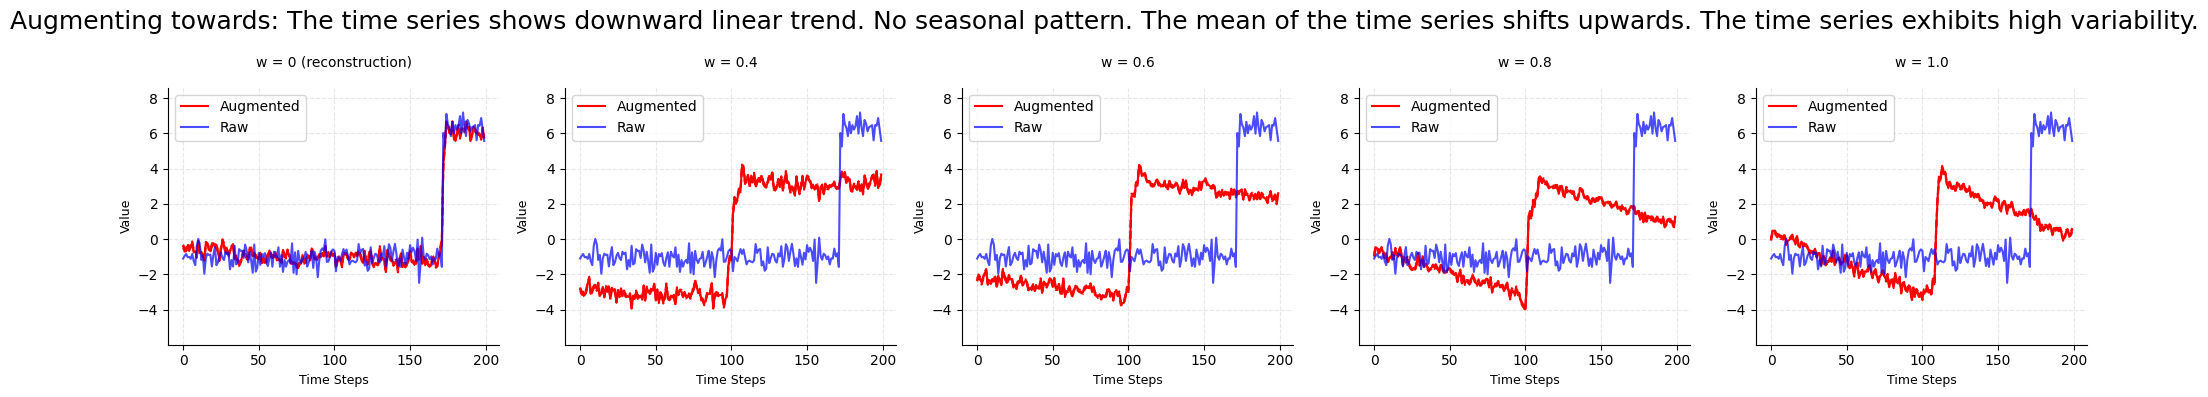

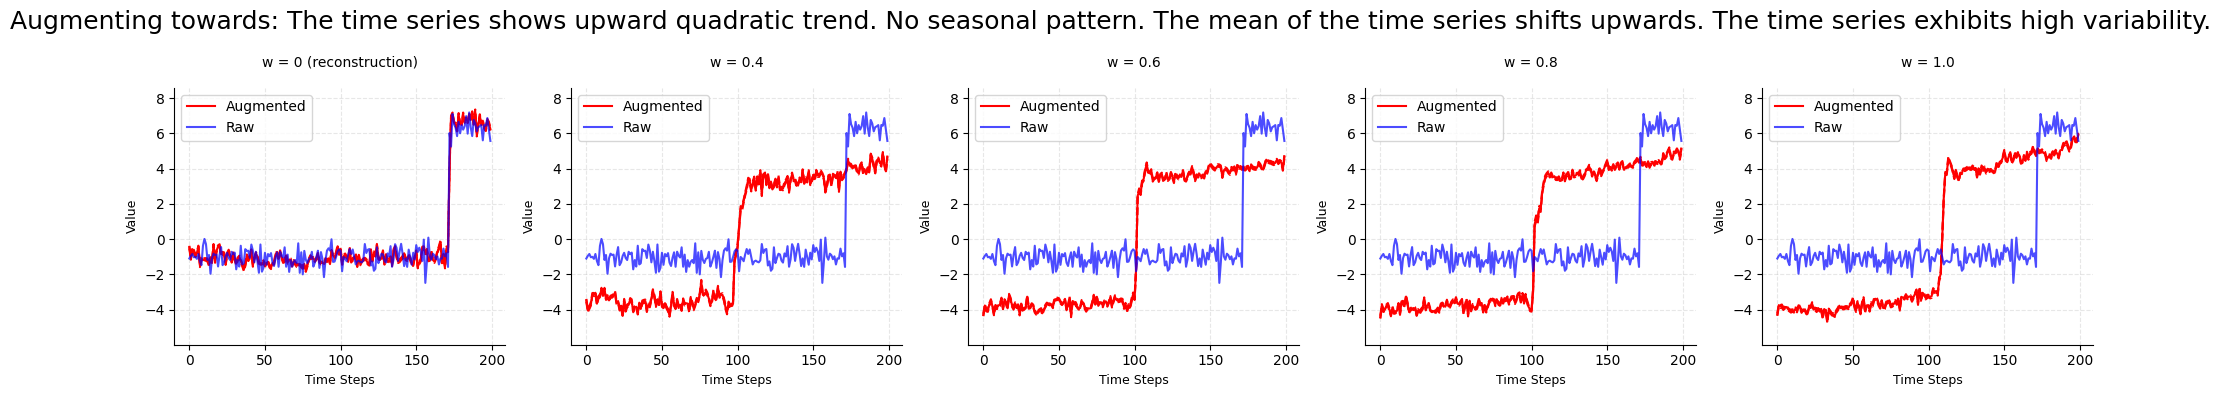

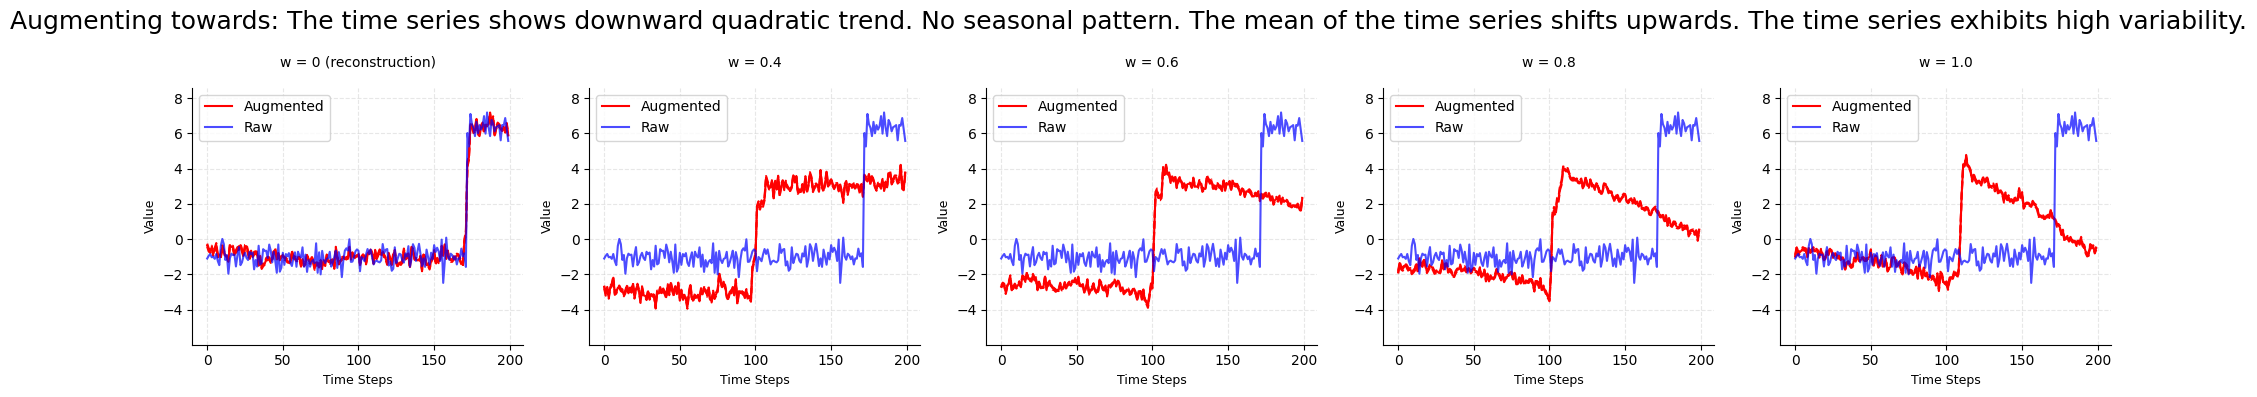

100    The time series shows upward linear trend.
Name: segment1, dtype: object


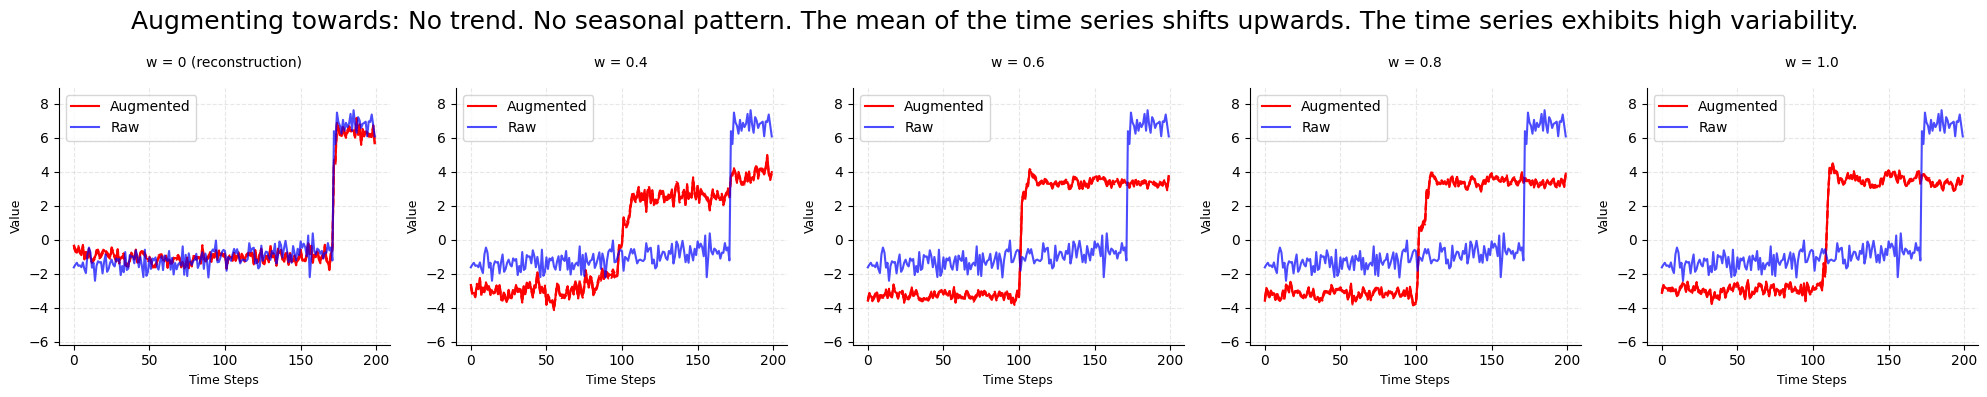

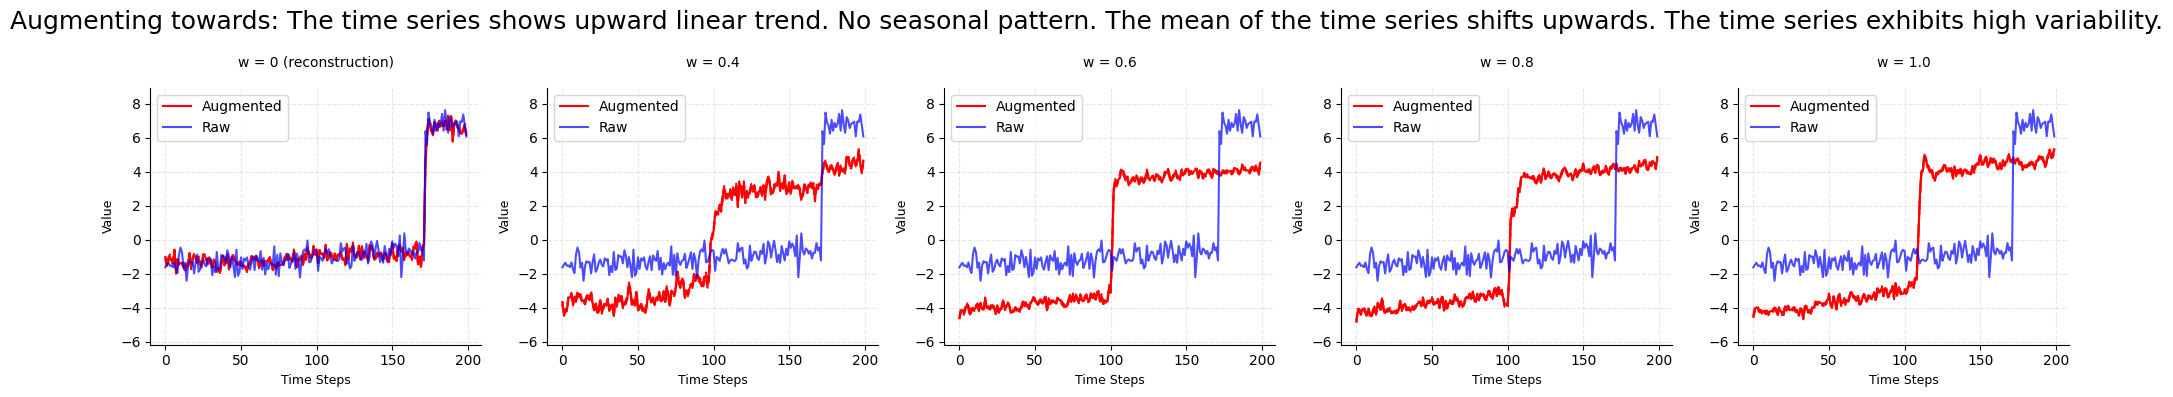

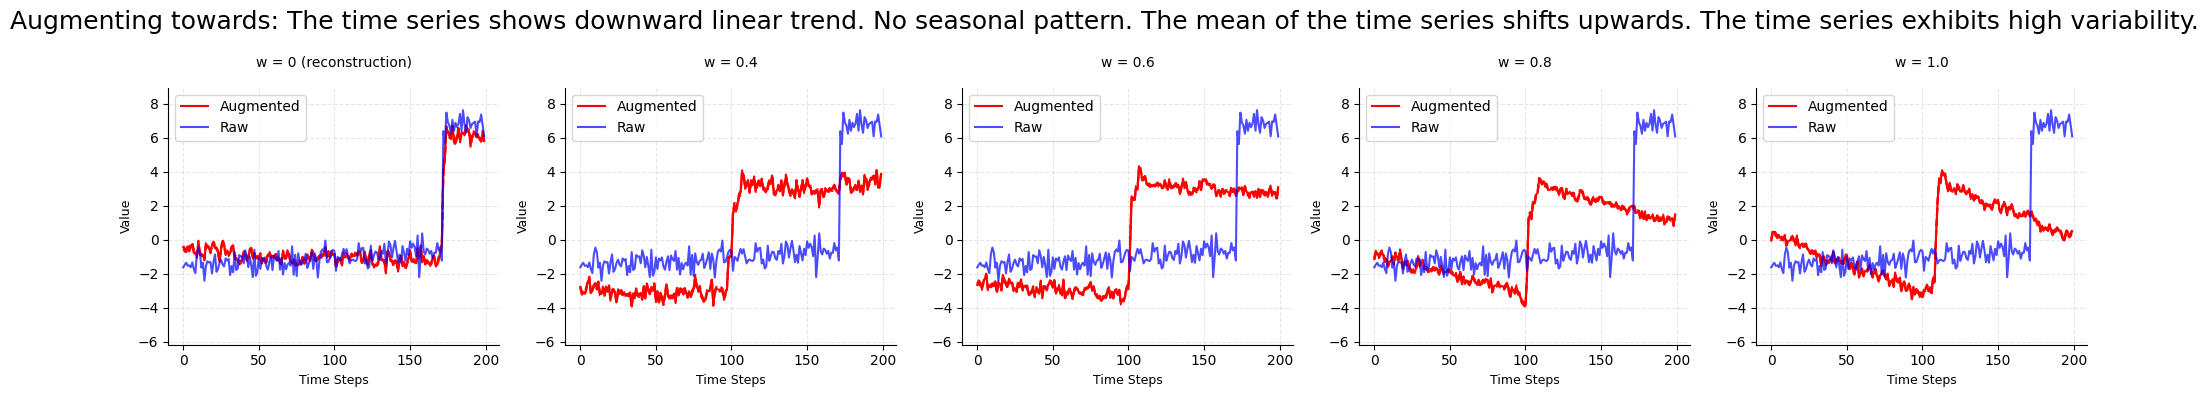

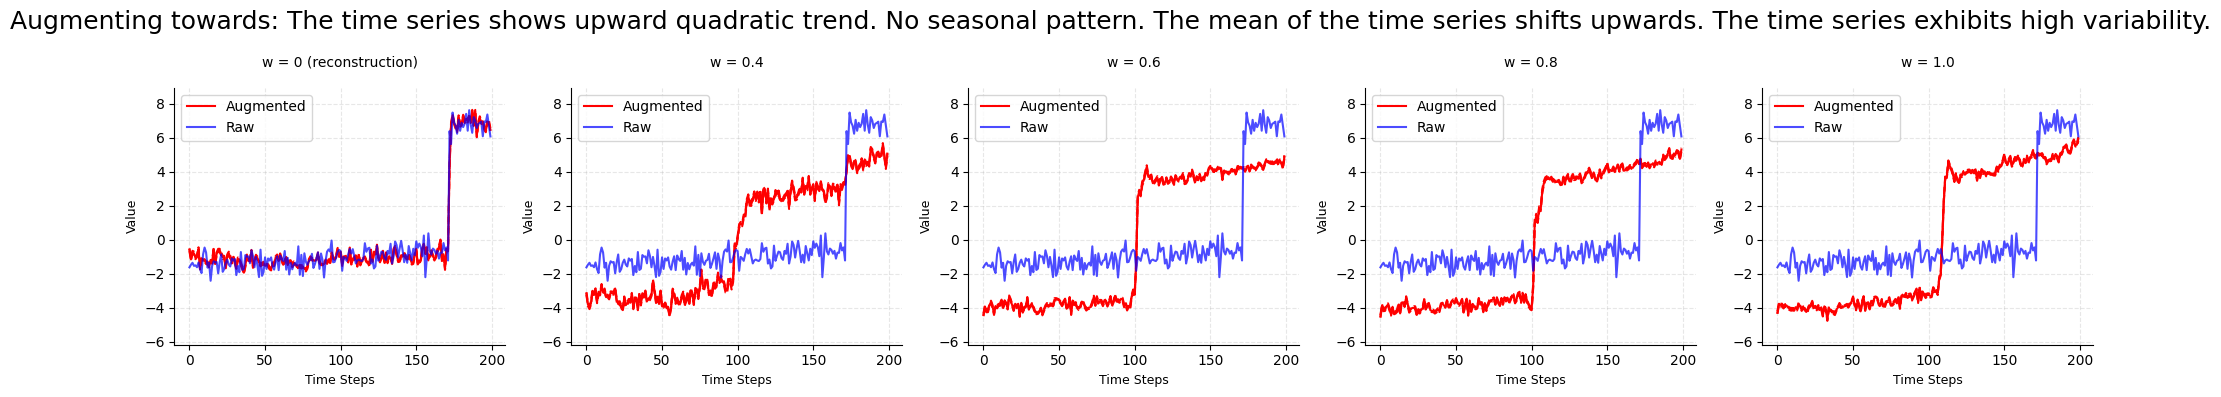

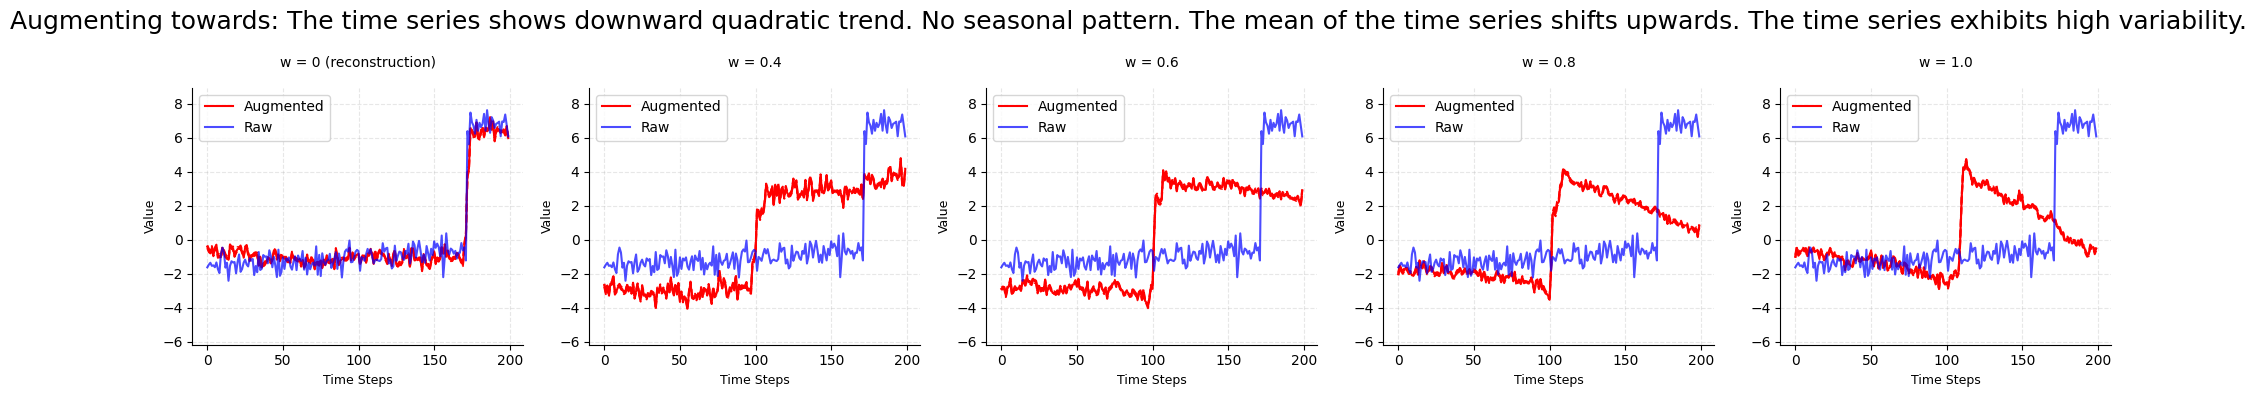

100    The time series shows downward linear trend.
Name: segment1, dtype: object


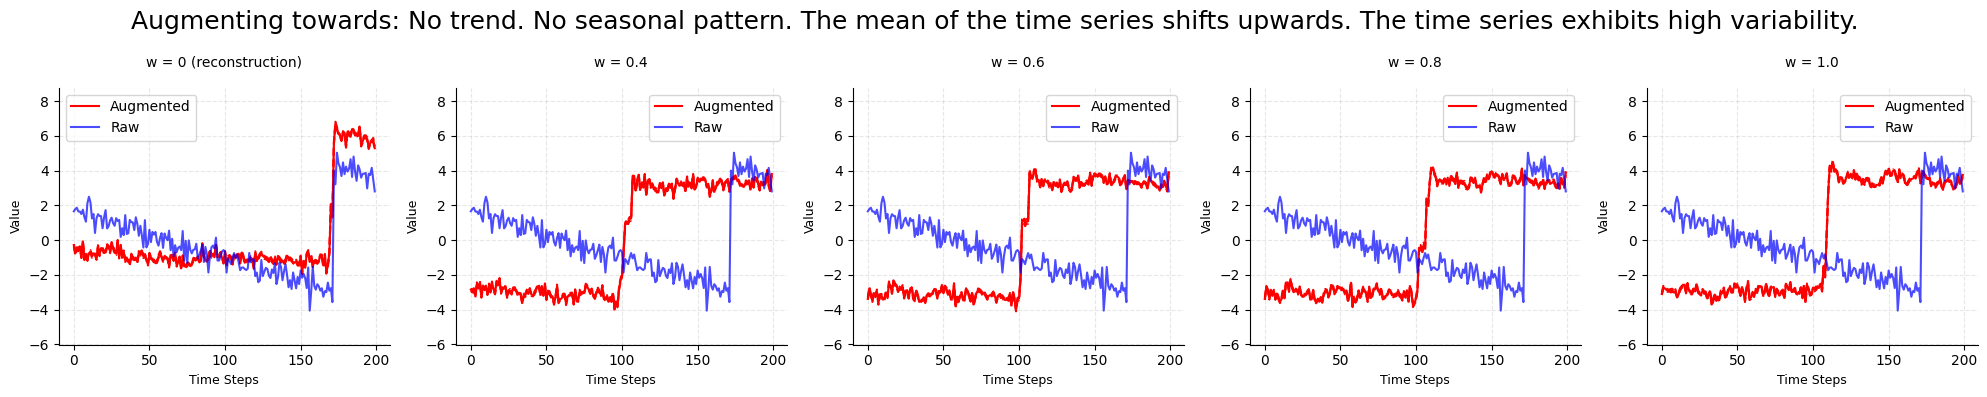

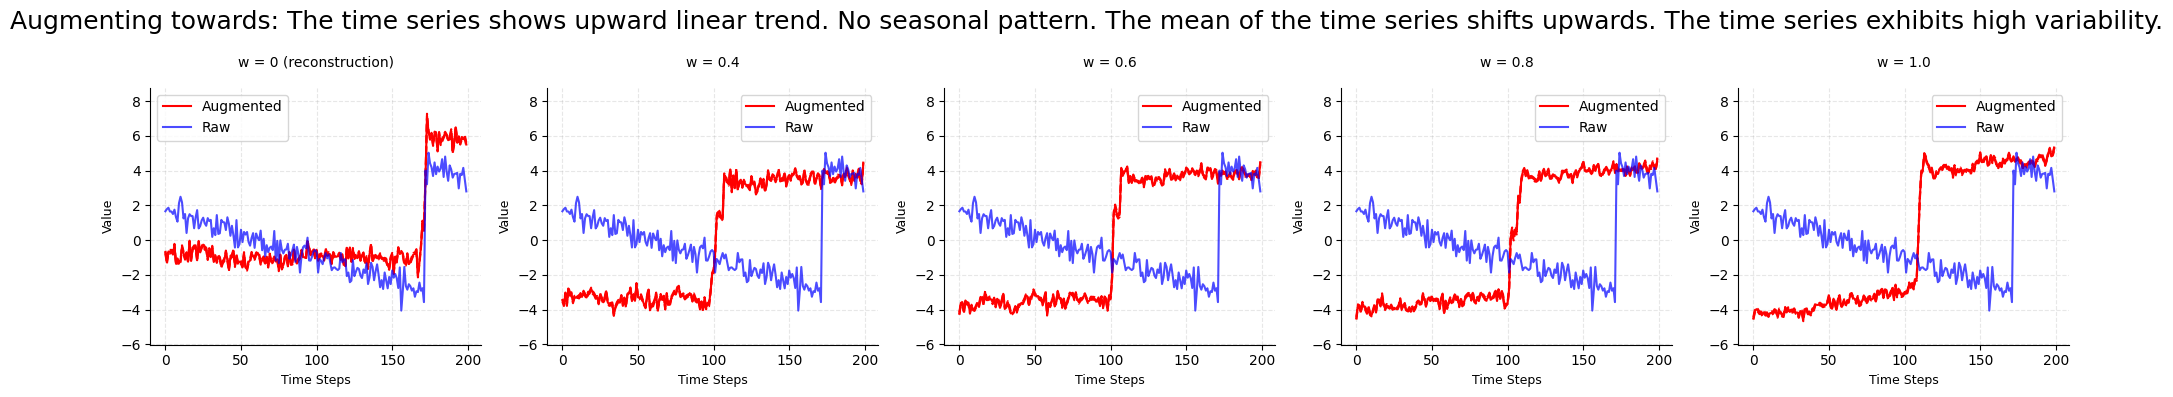

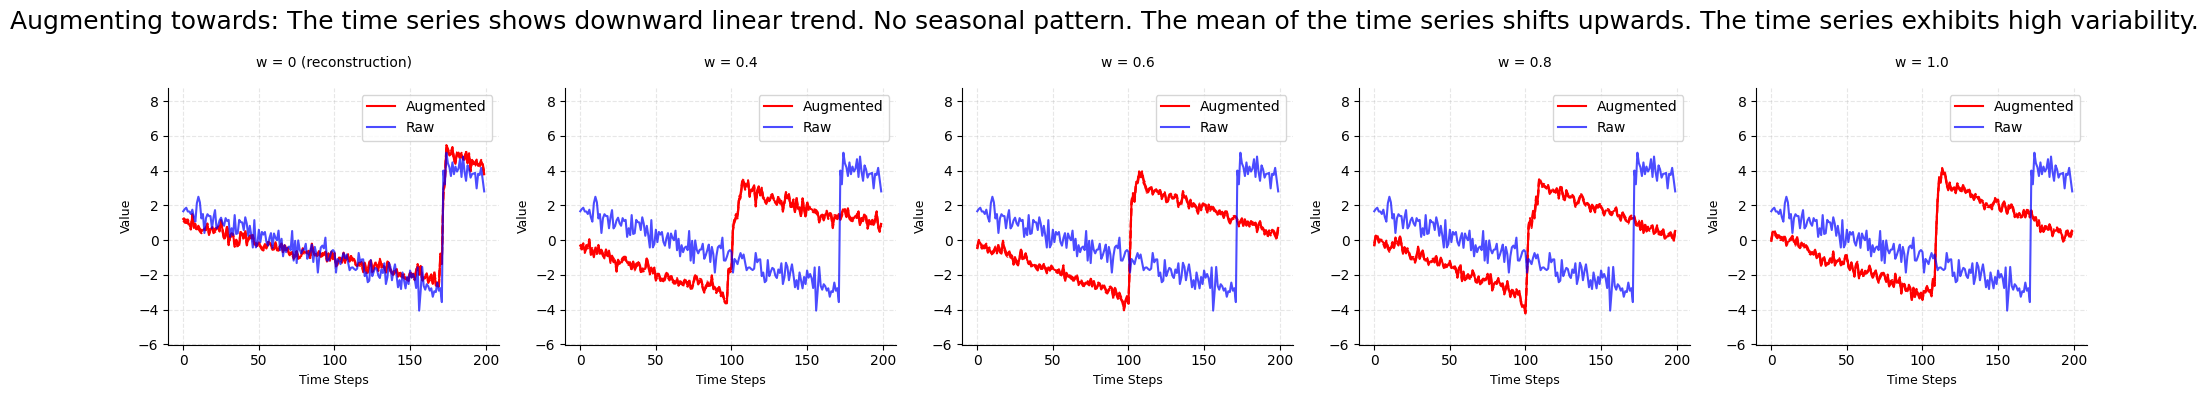

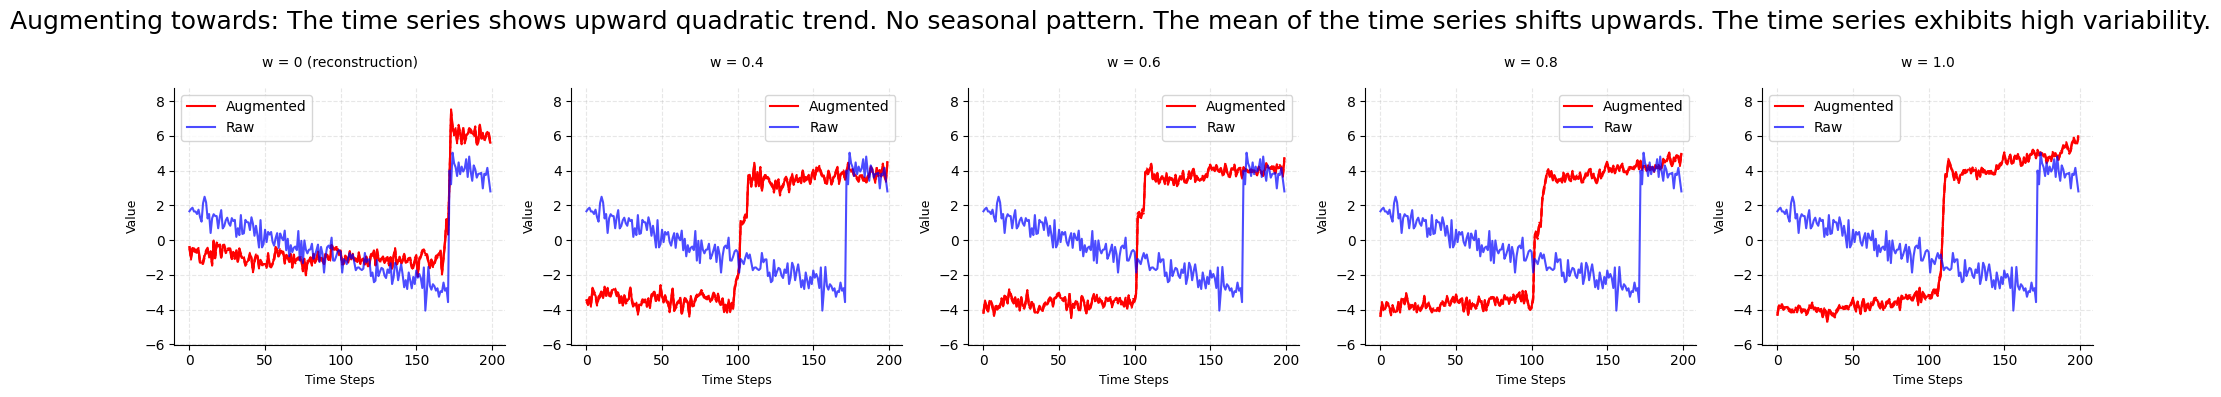

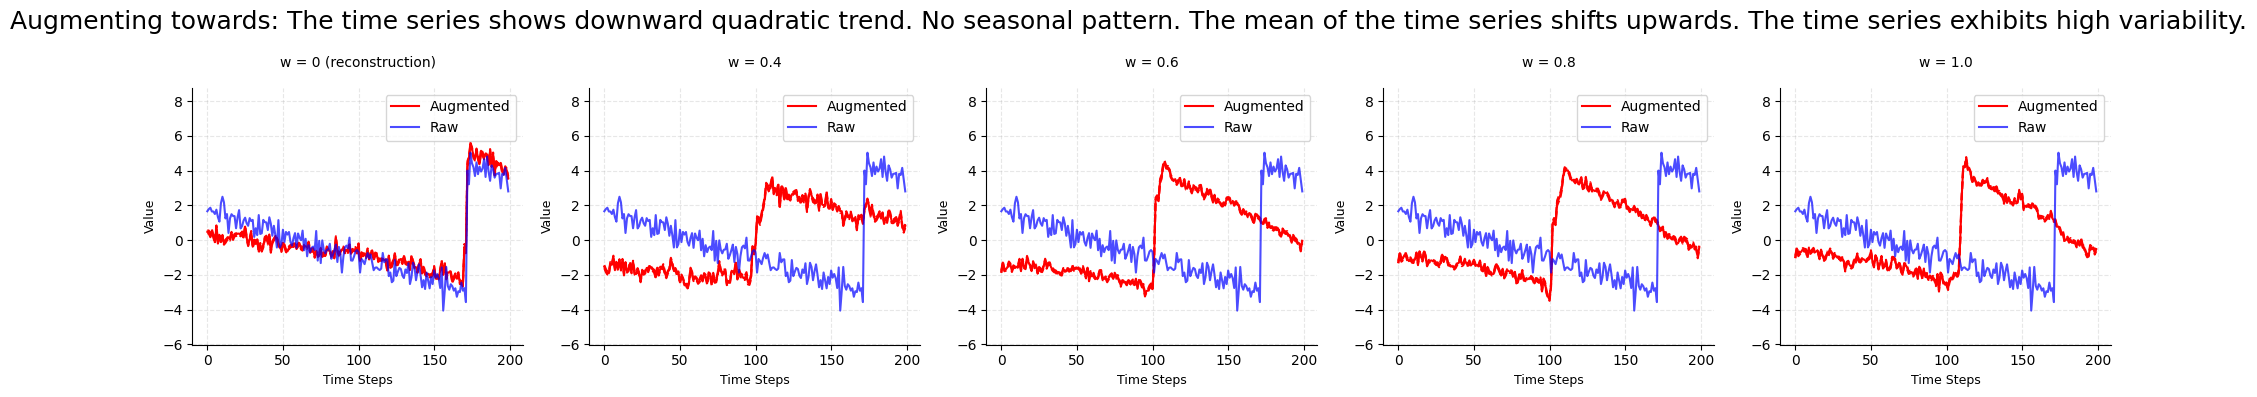

100    The time series shows upward quadratic trend.
Name: segment1, dtype: object


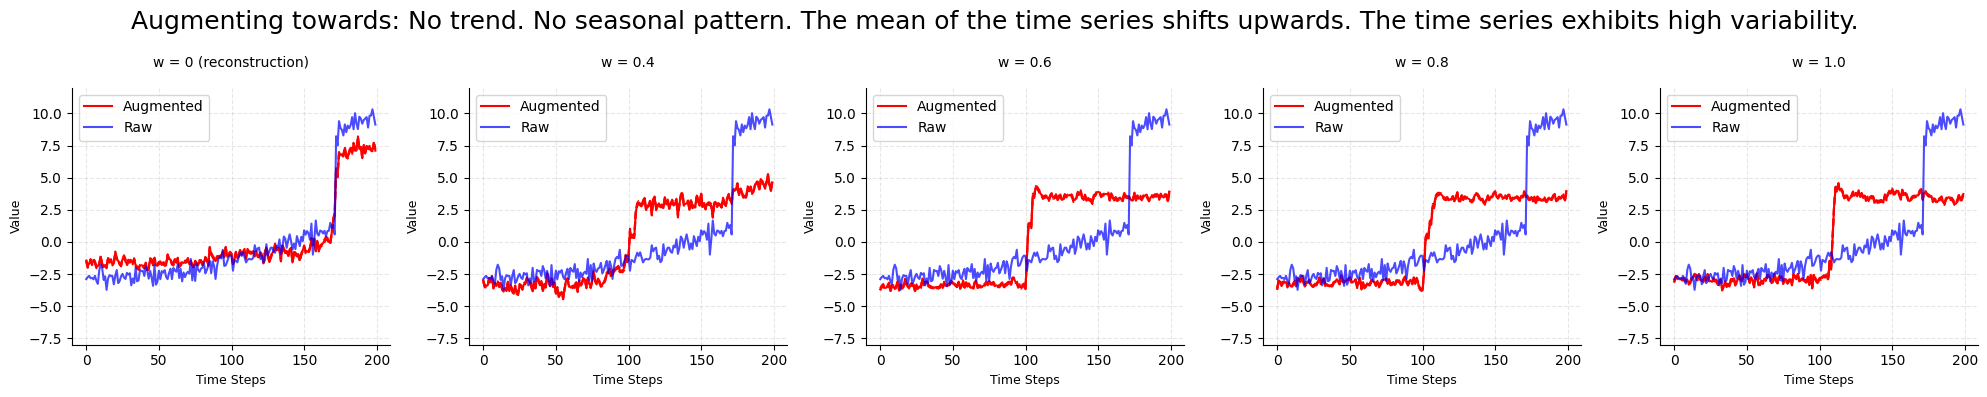

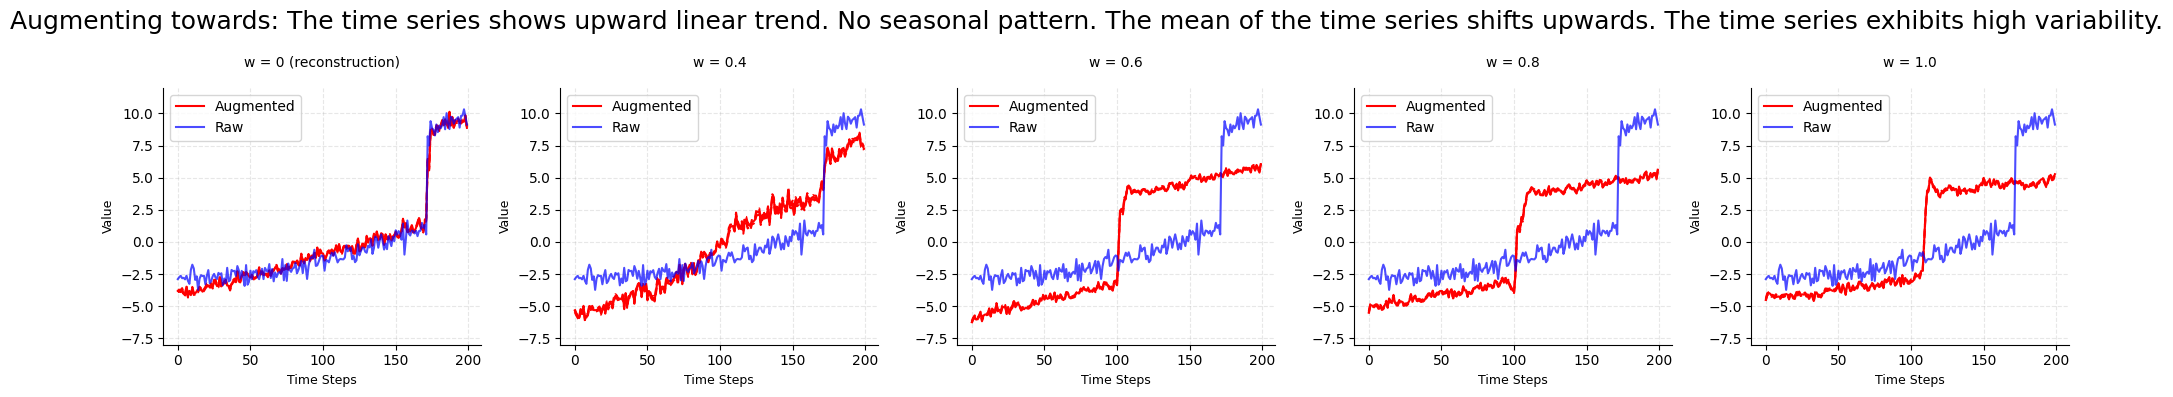

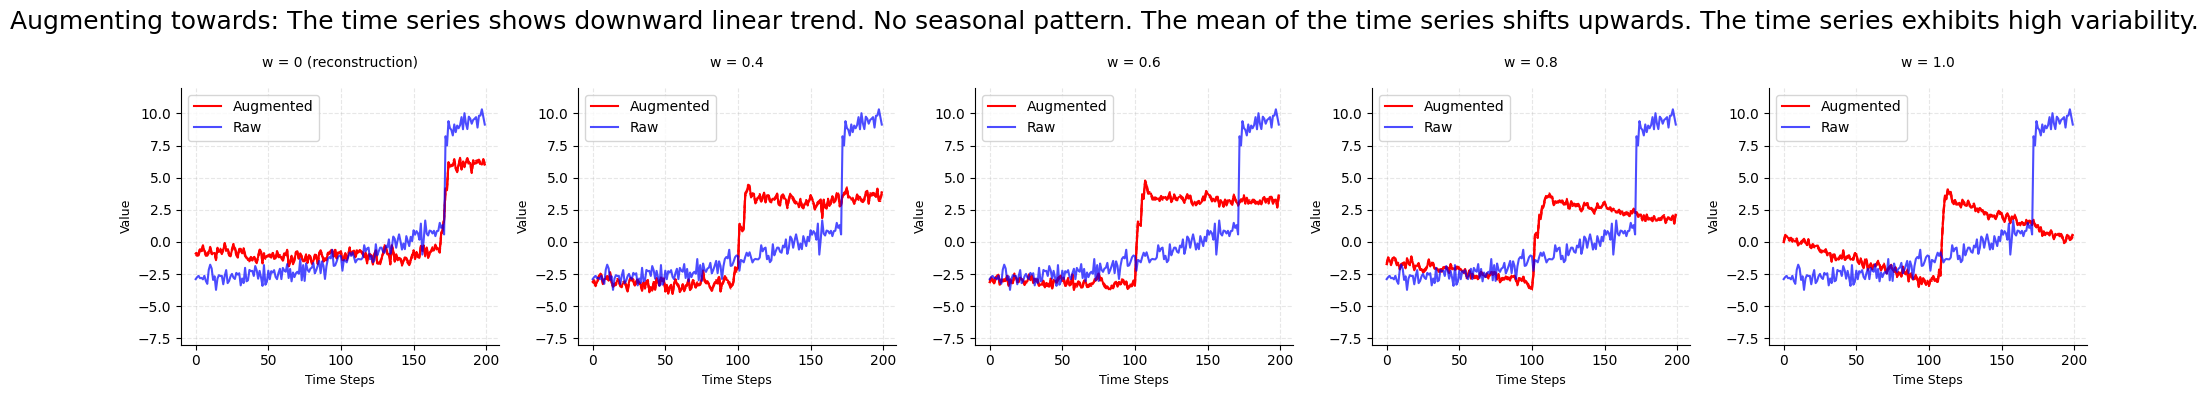

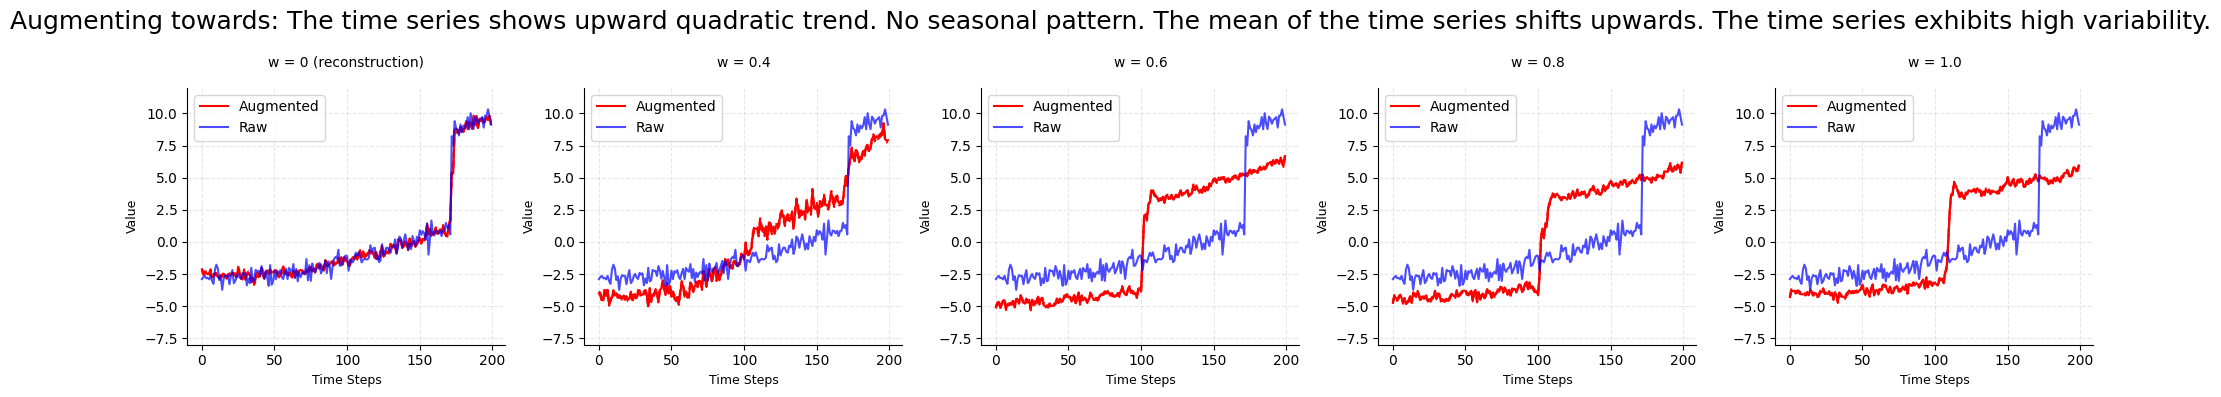

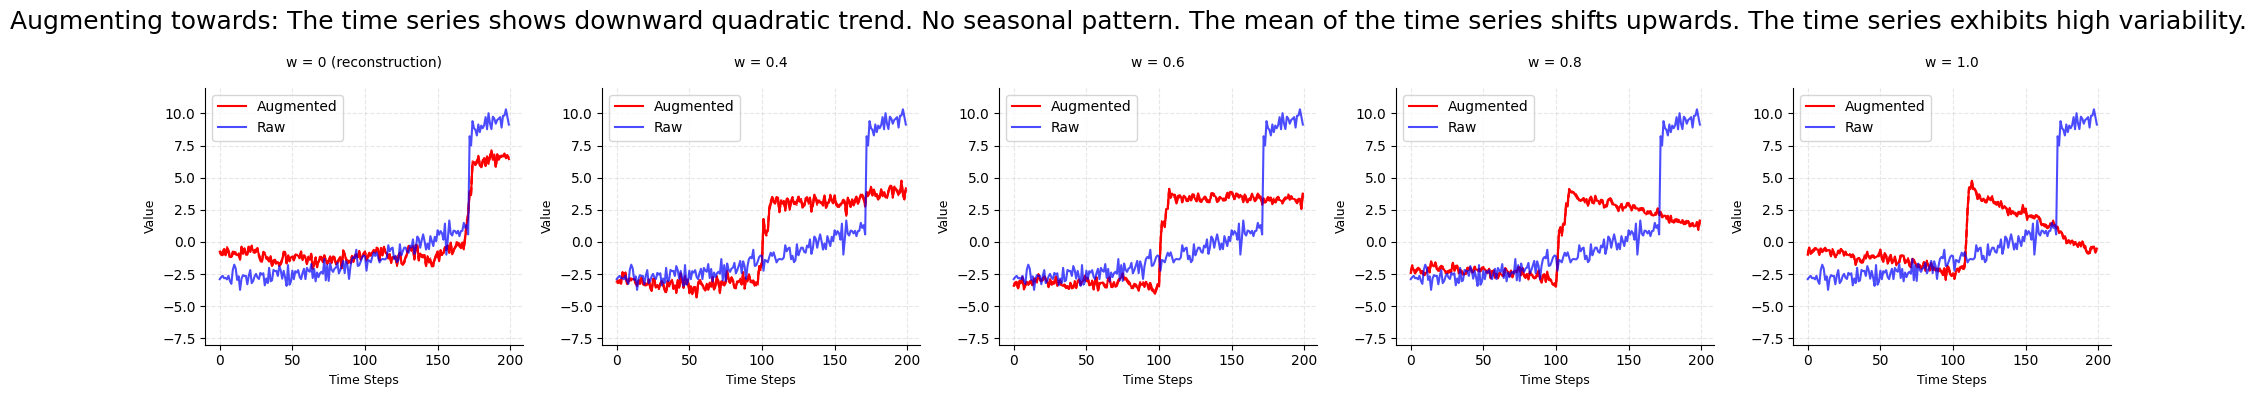

100    The time series shows downward quadratic trend.
Name: segment1, dtype: object


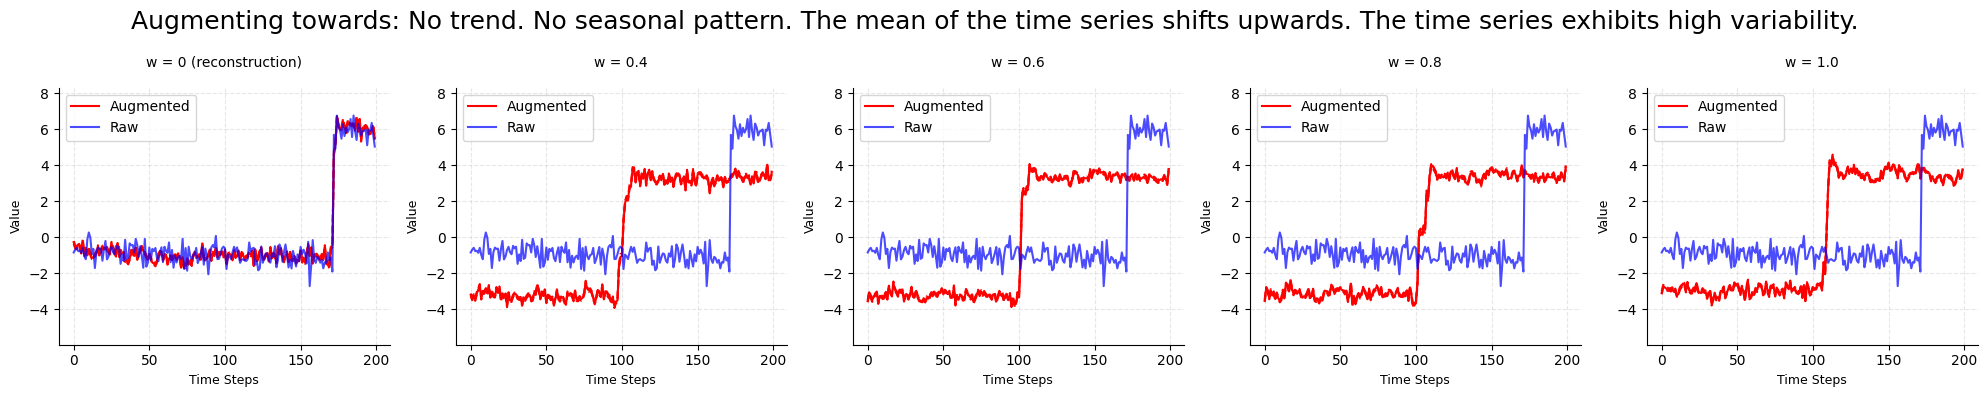

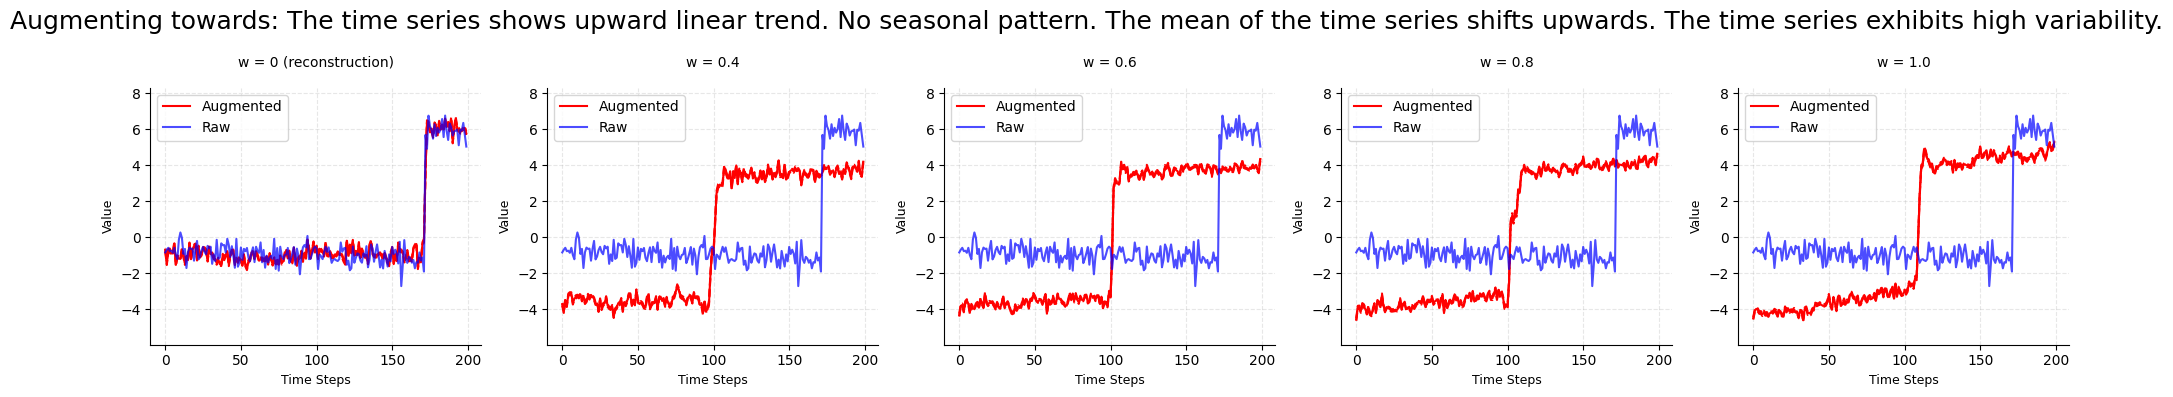

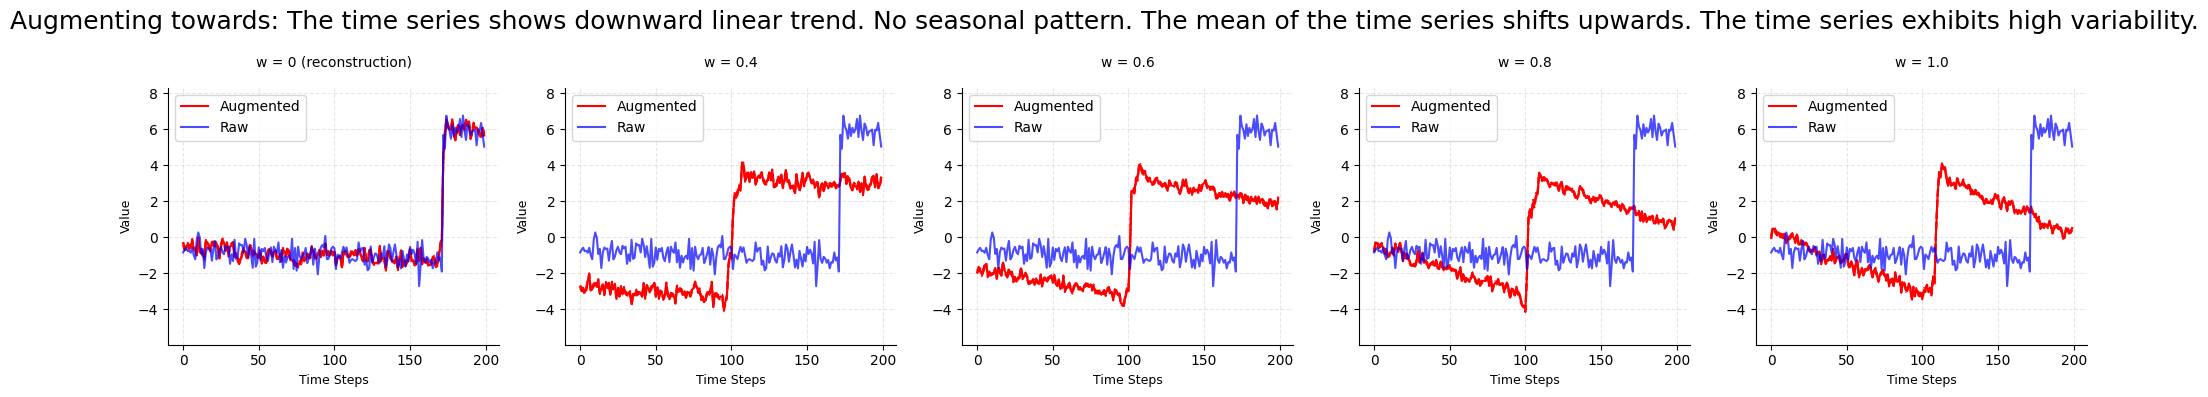

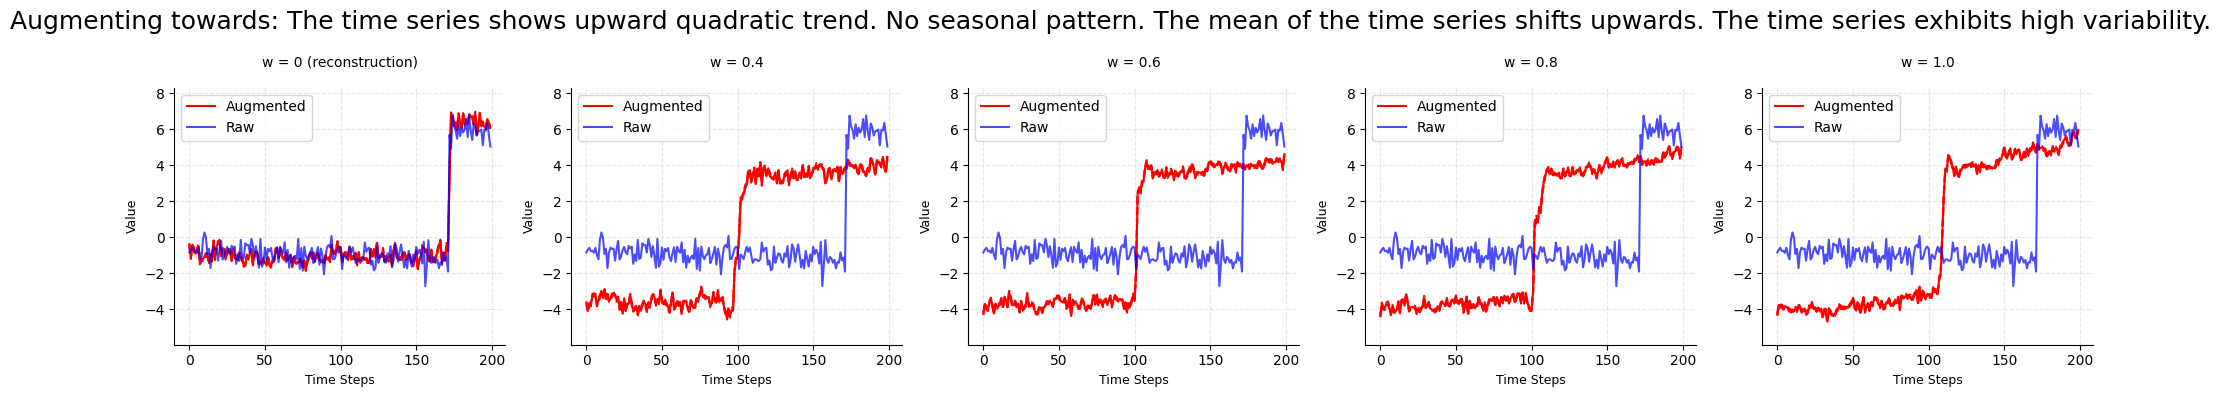

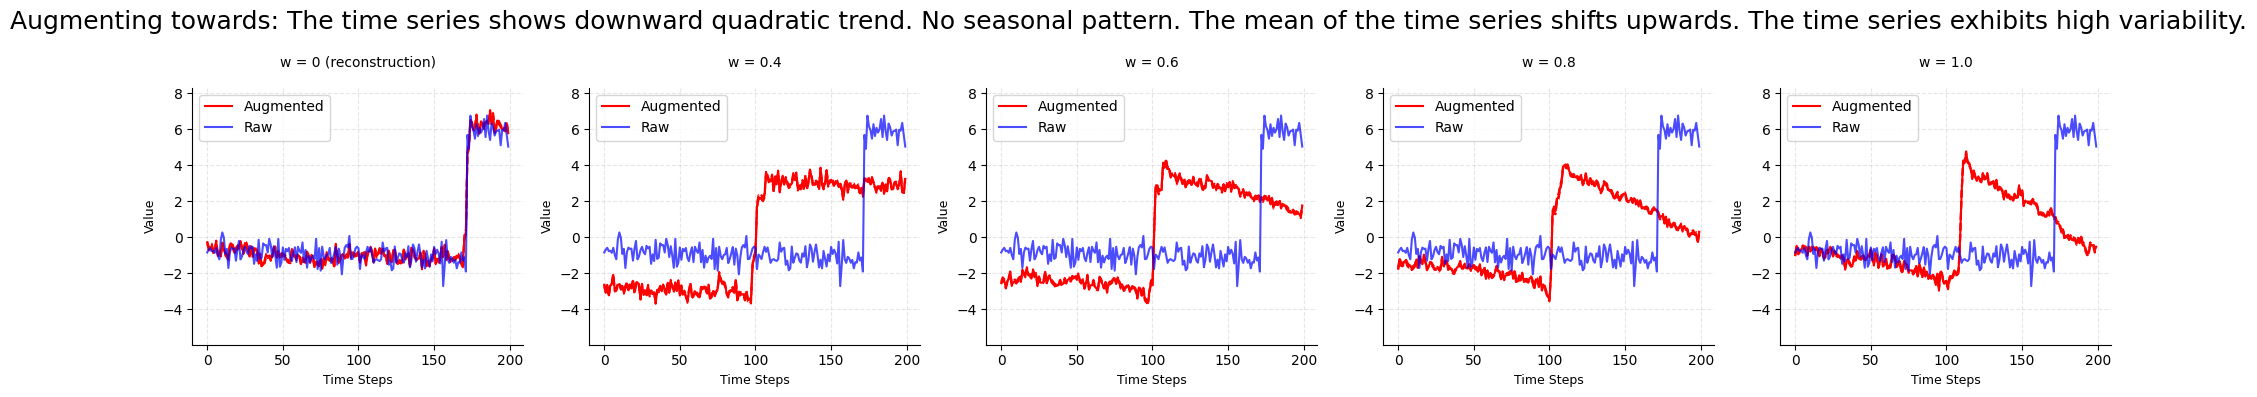

100    No seasonal pattern.
Name: segment2, dtype: object


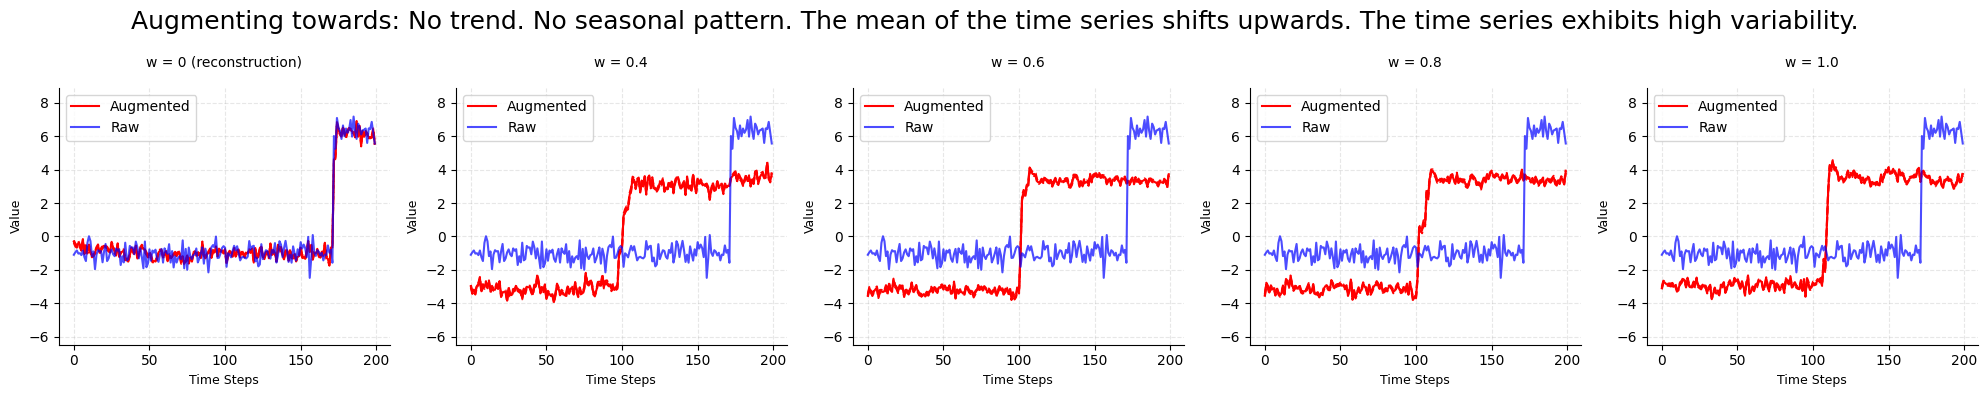

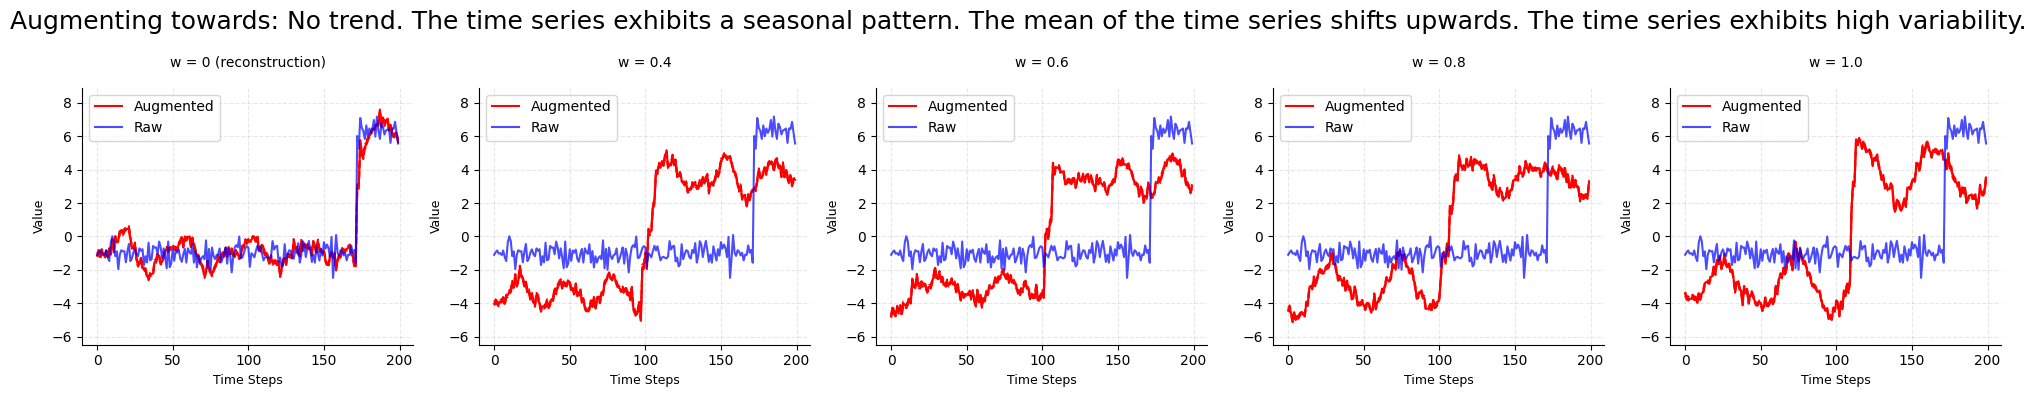

100    The time series exhibits a seasonal pattern.
Name: segment2, dtype: object


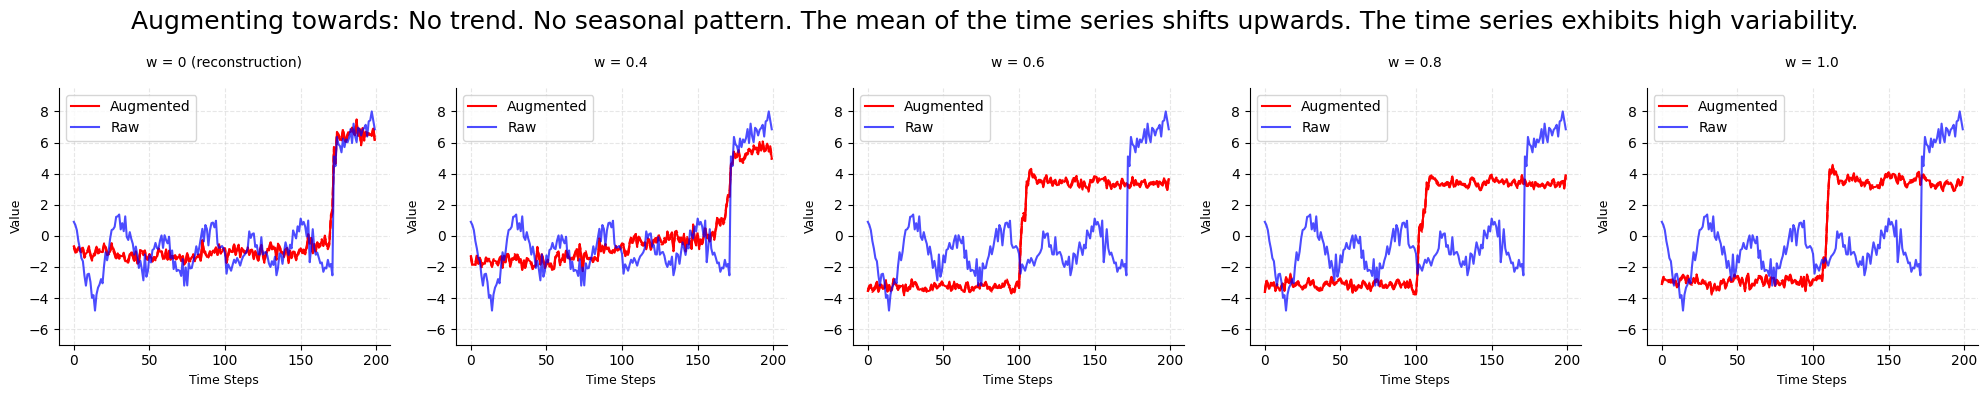

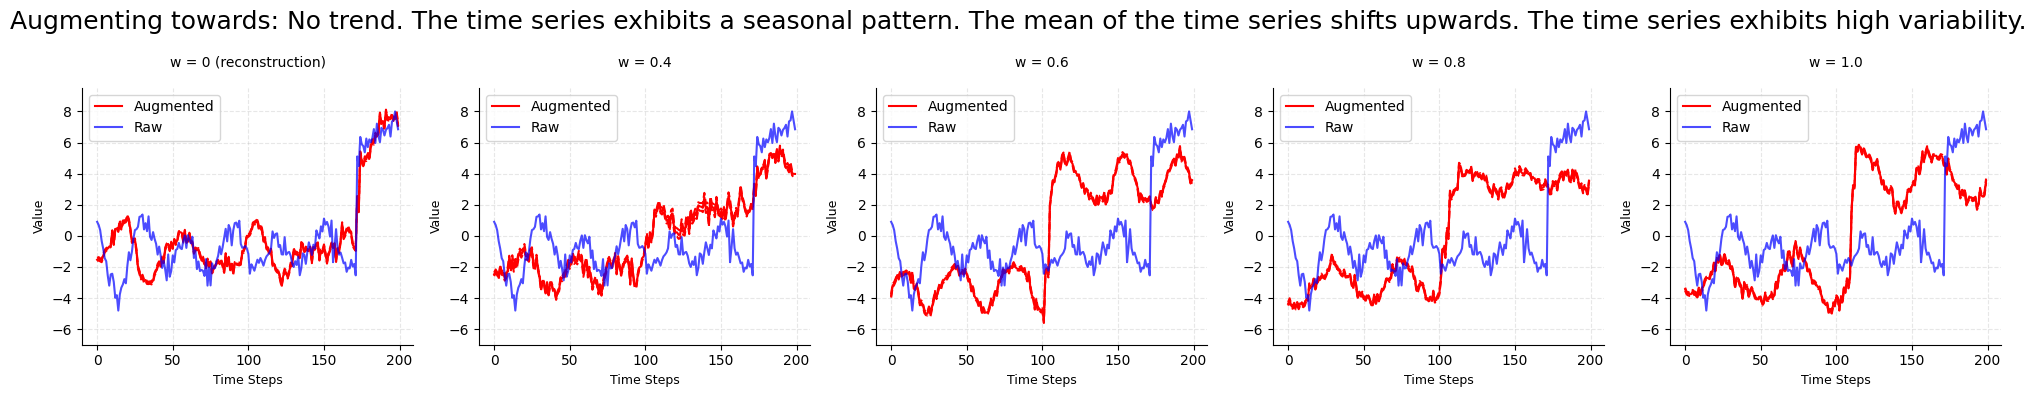

100    No sharp shifts.
Name: segment3, dtype: object


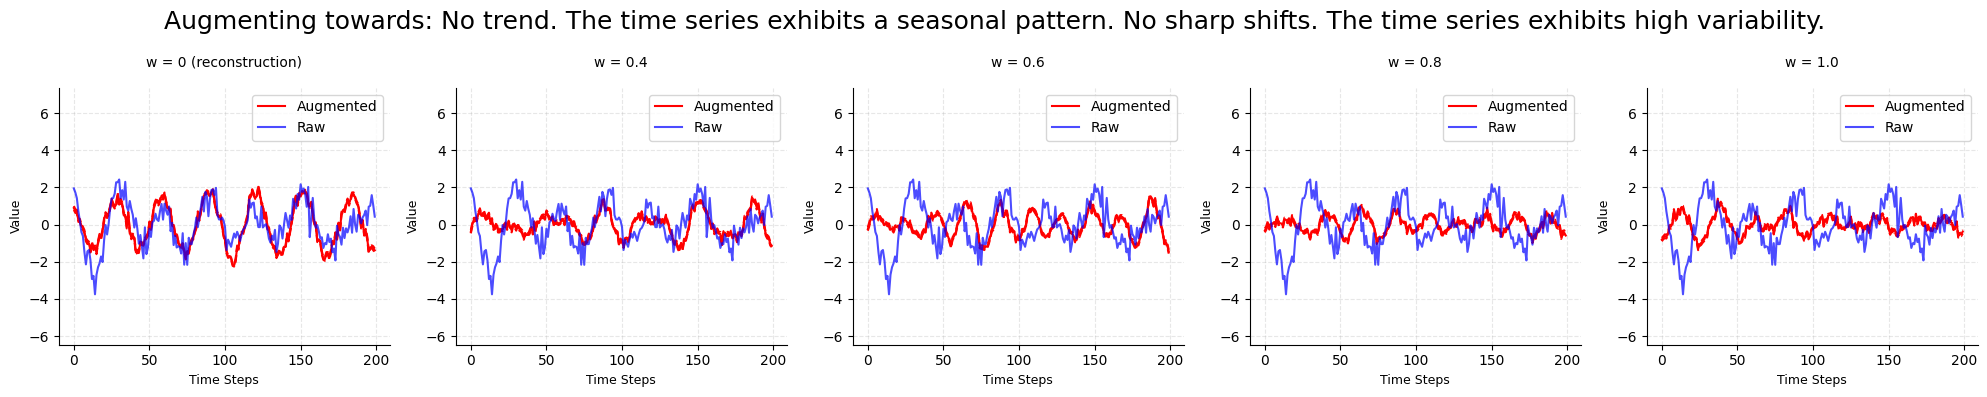

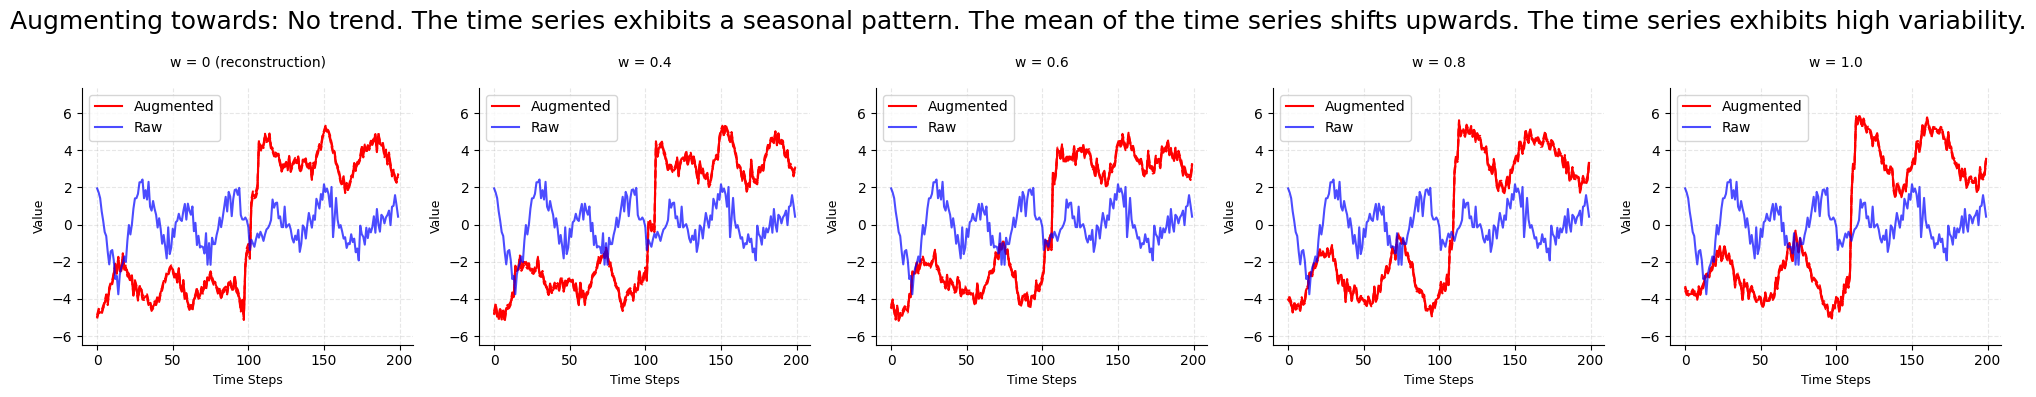

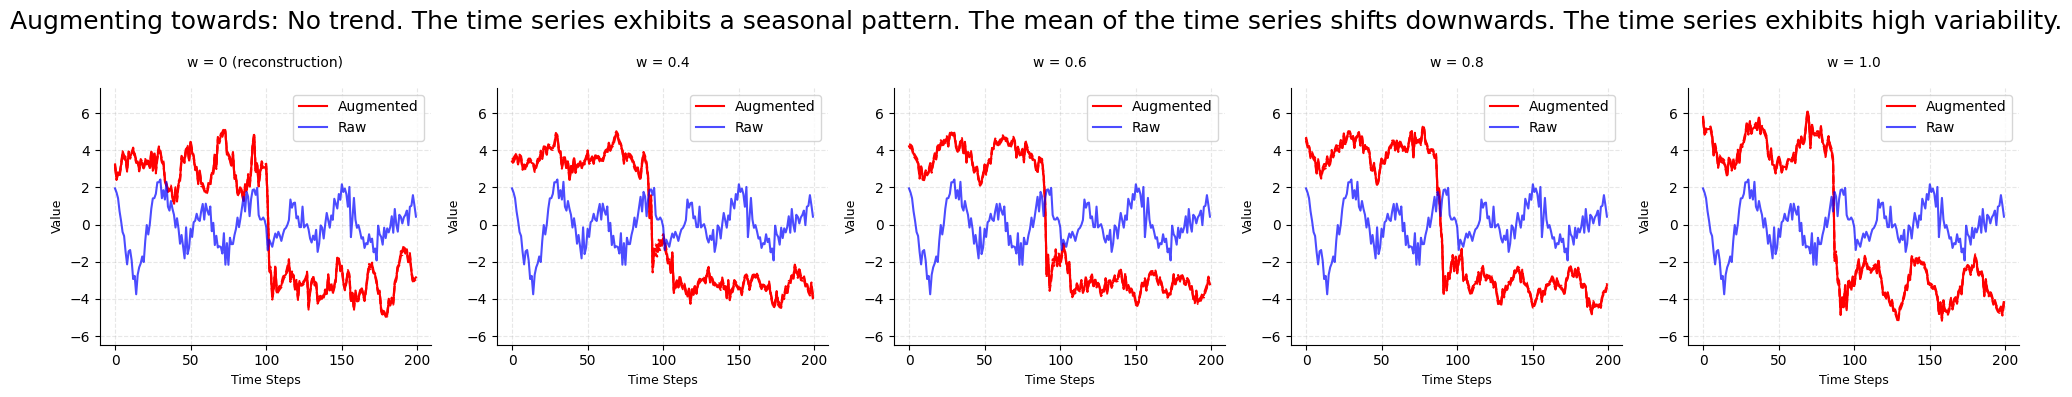

100    The mean of the time series shifts upwards.
Name: segment3, dtype: object


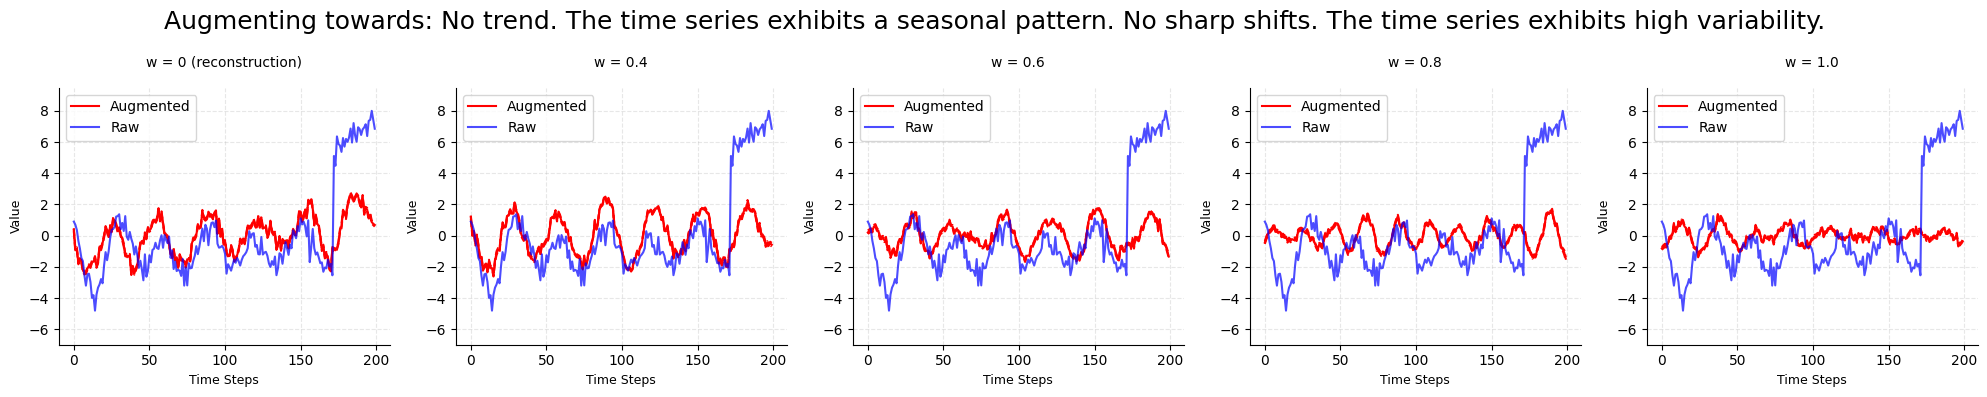

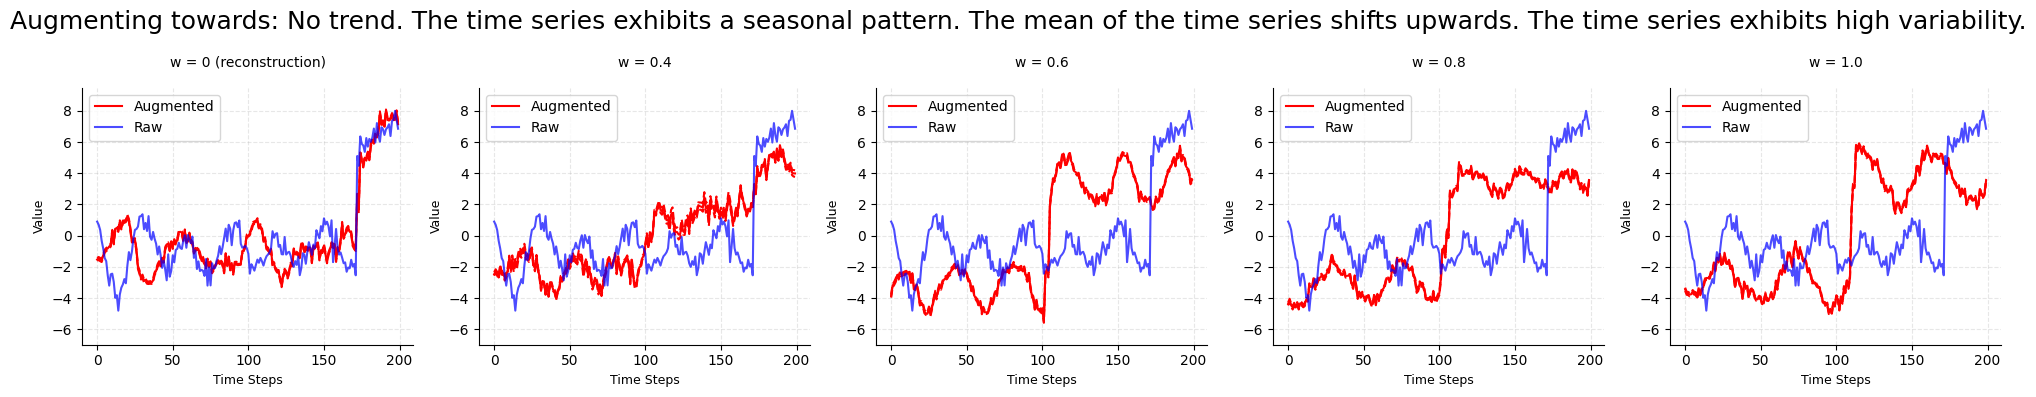

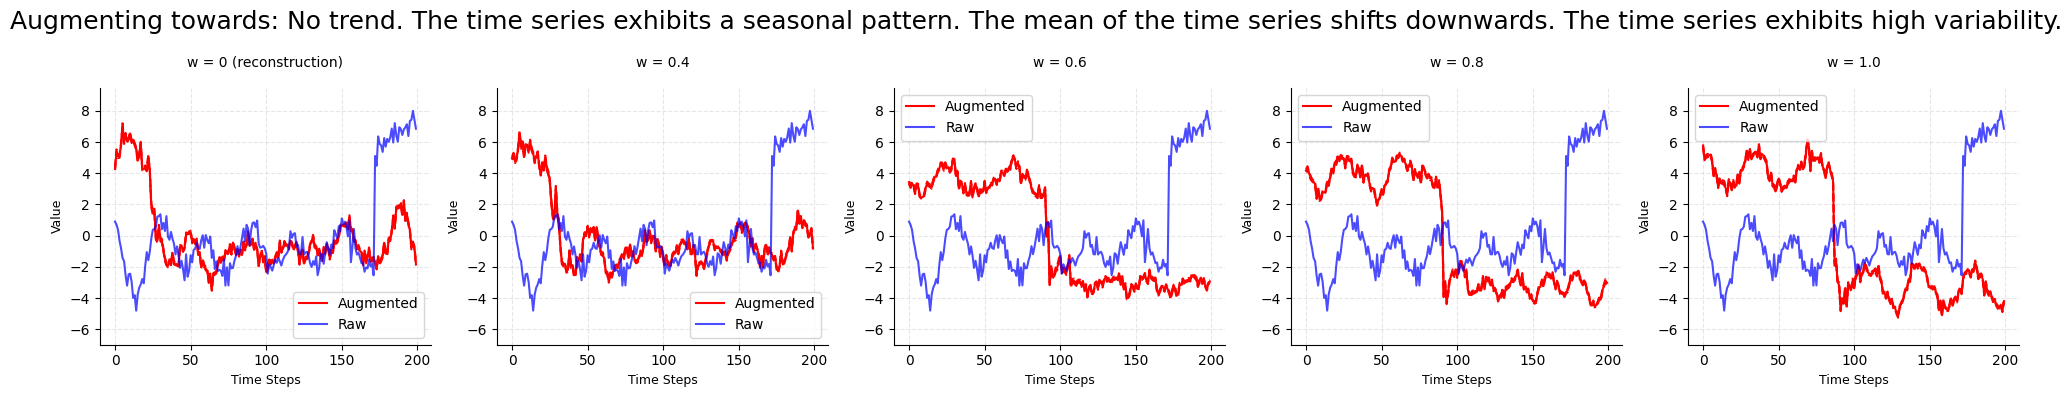

100    The mean of the time series shifts downwards.
Name: segment3, dtype: object


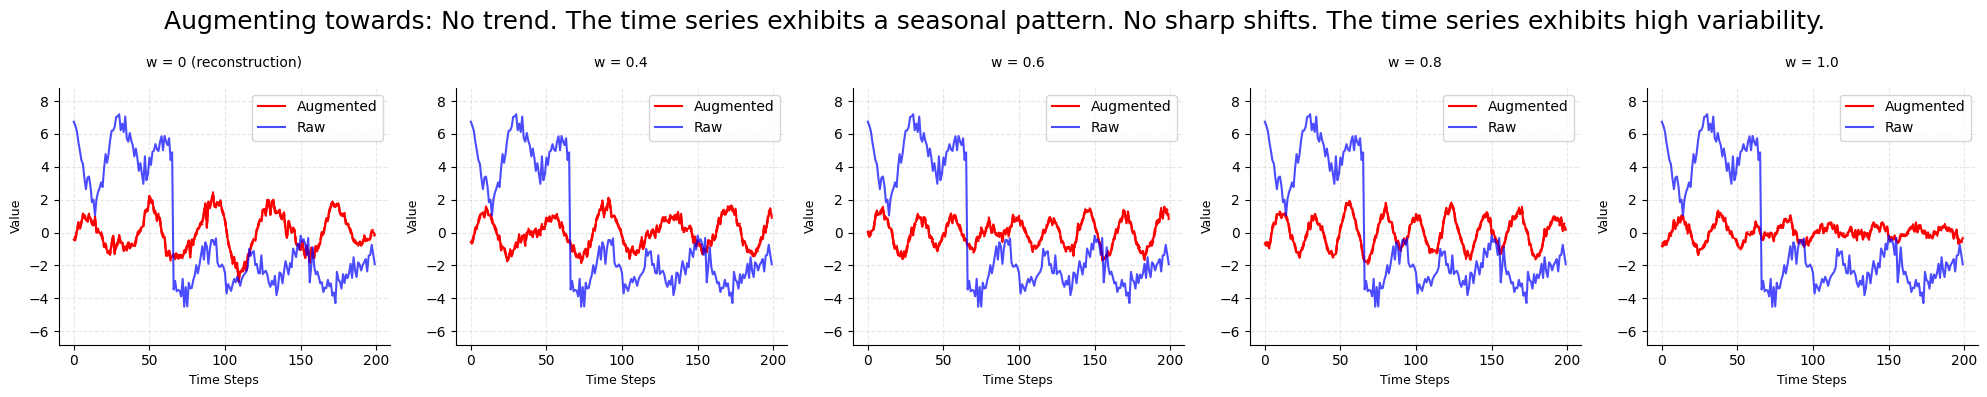

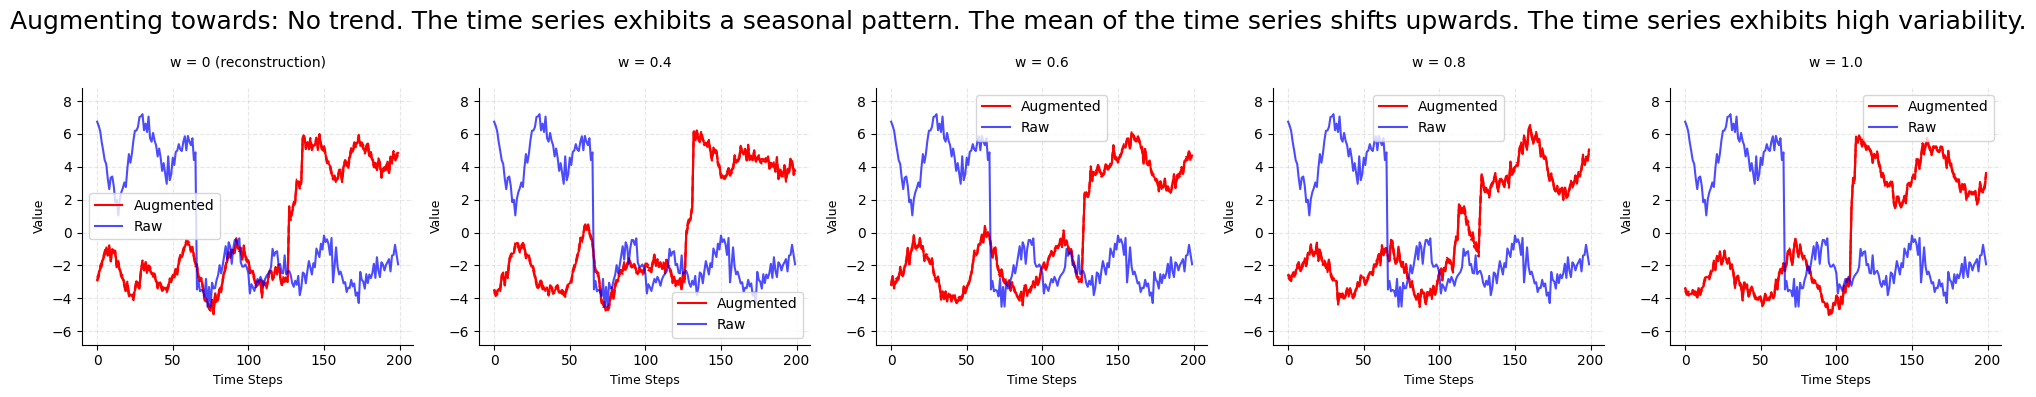

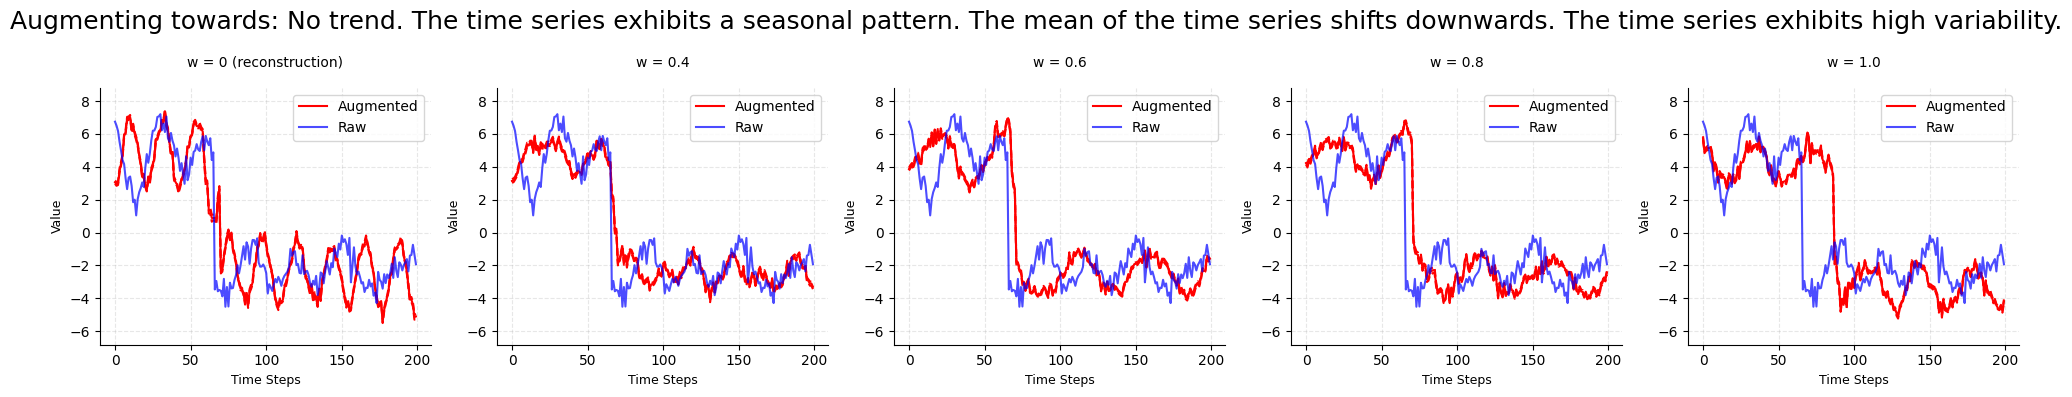

100    The time series exhibits low variability.
Name: segment4, dtype: object


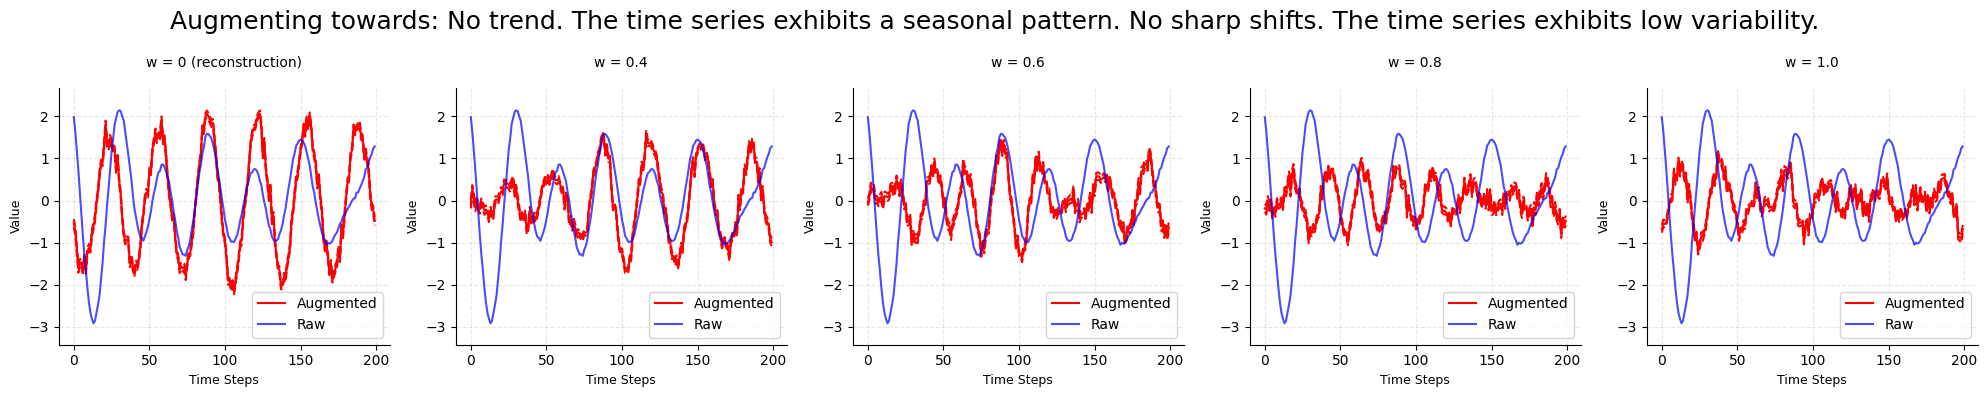

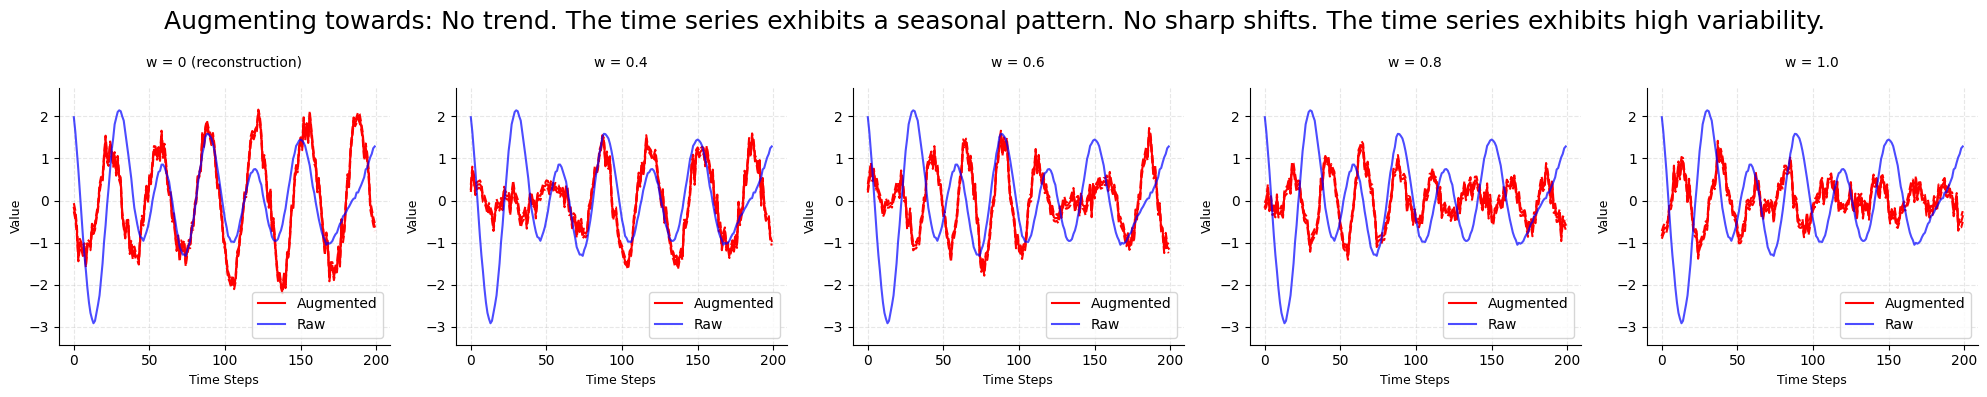

100    The time series exhibits high variability.
Name: segment4, dtype: object


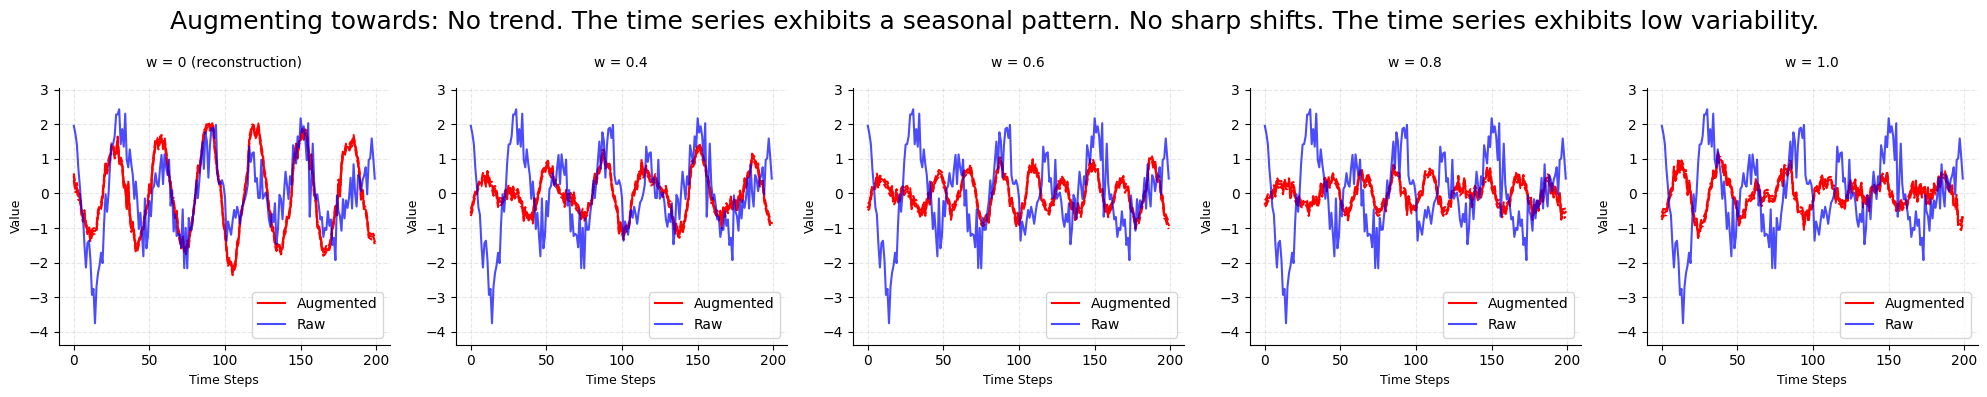

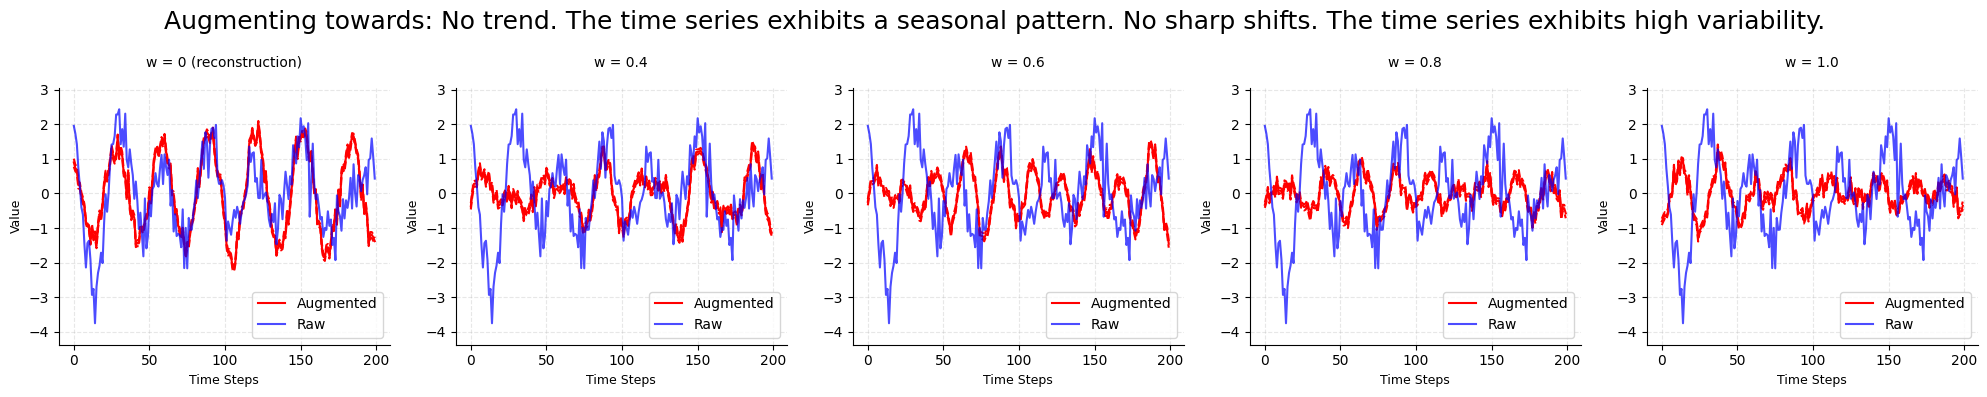

In [13]:
tid=100
# viz_generation_marginal(df_train, model, config_dict, tid=tid)
viz_generation_conditional(df_left, model, config_dict, tid=tid, sampling=True, b=100, ep=1)

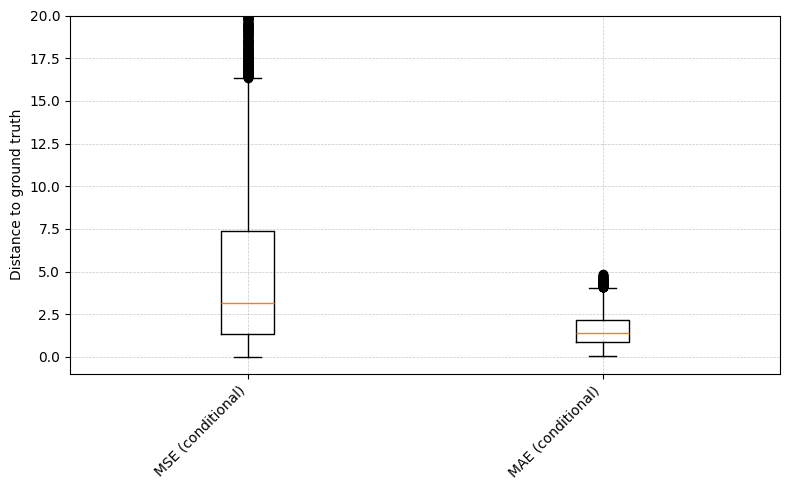

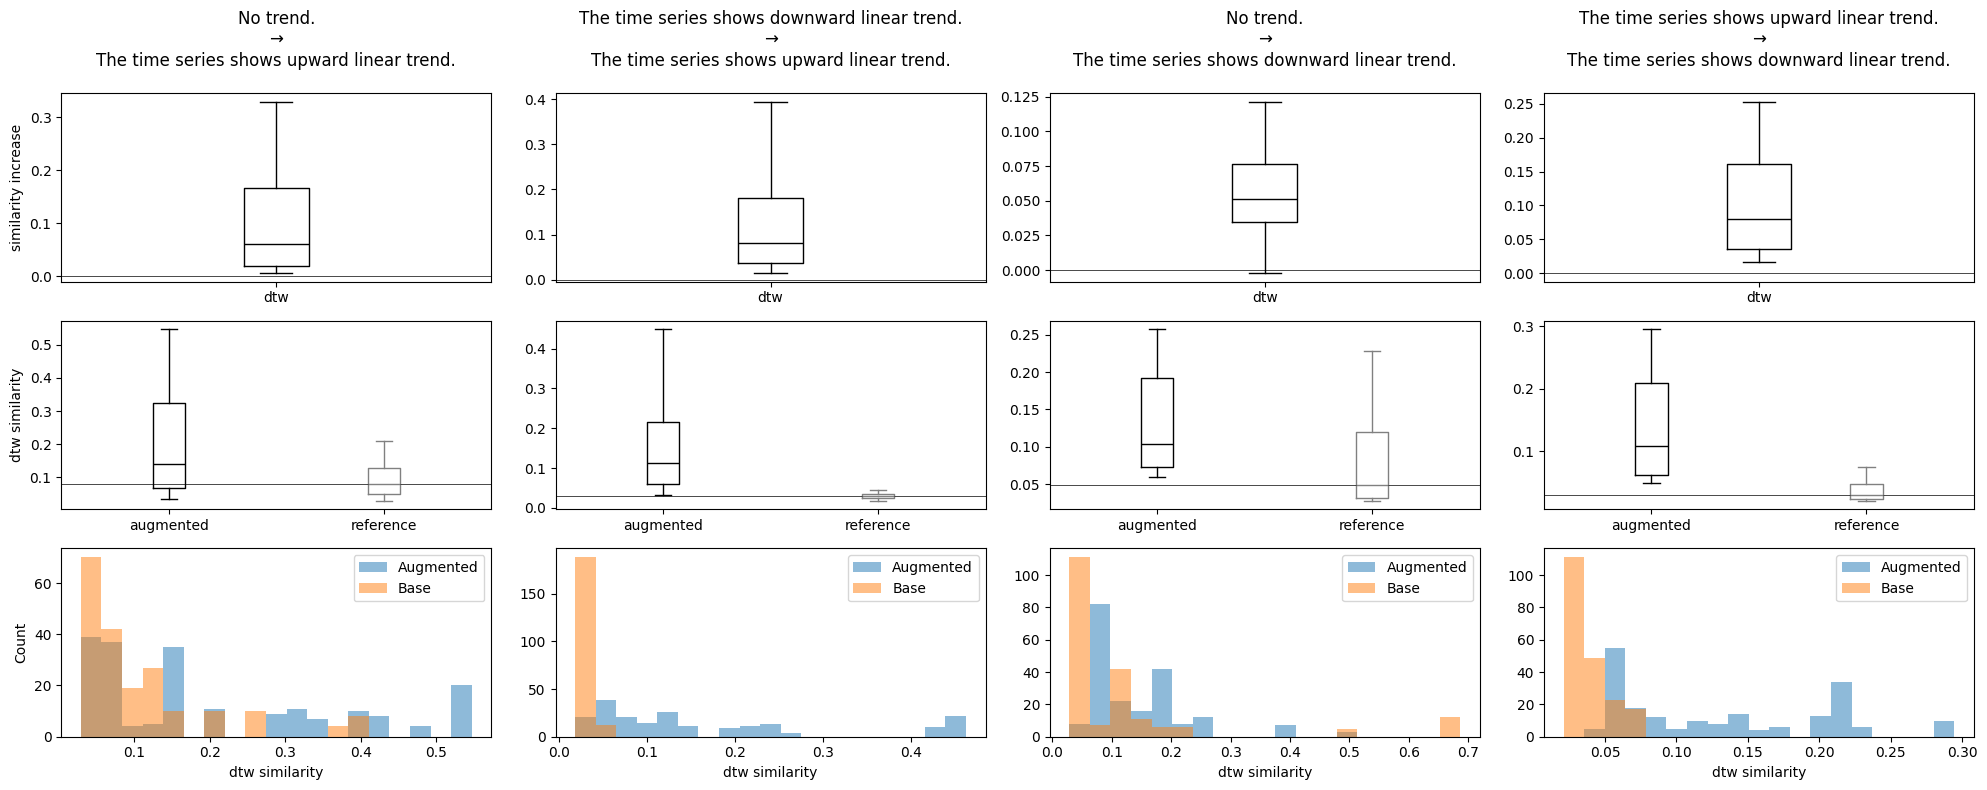

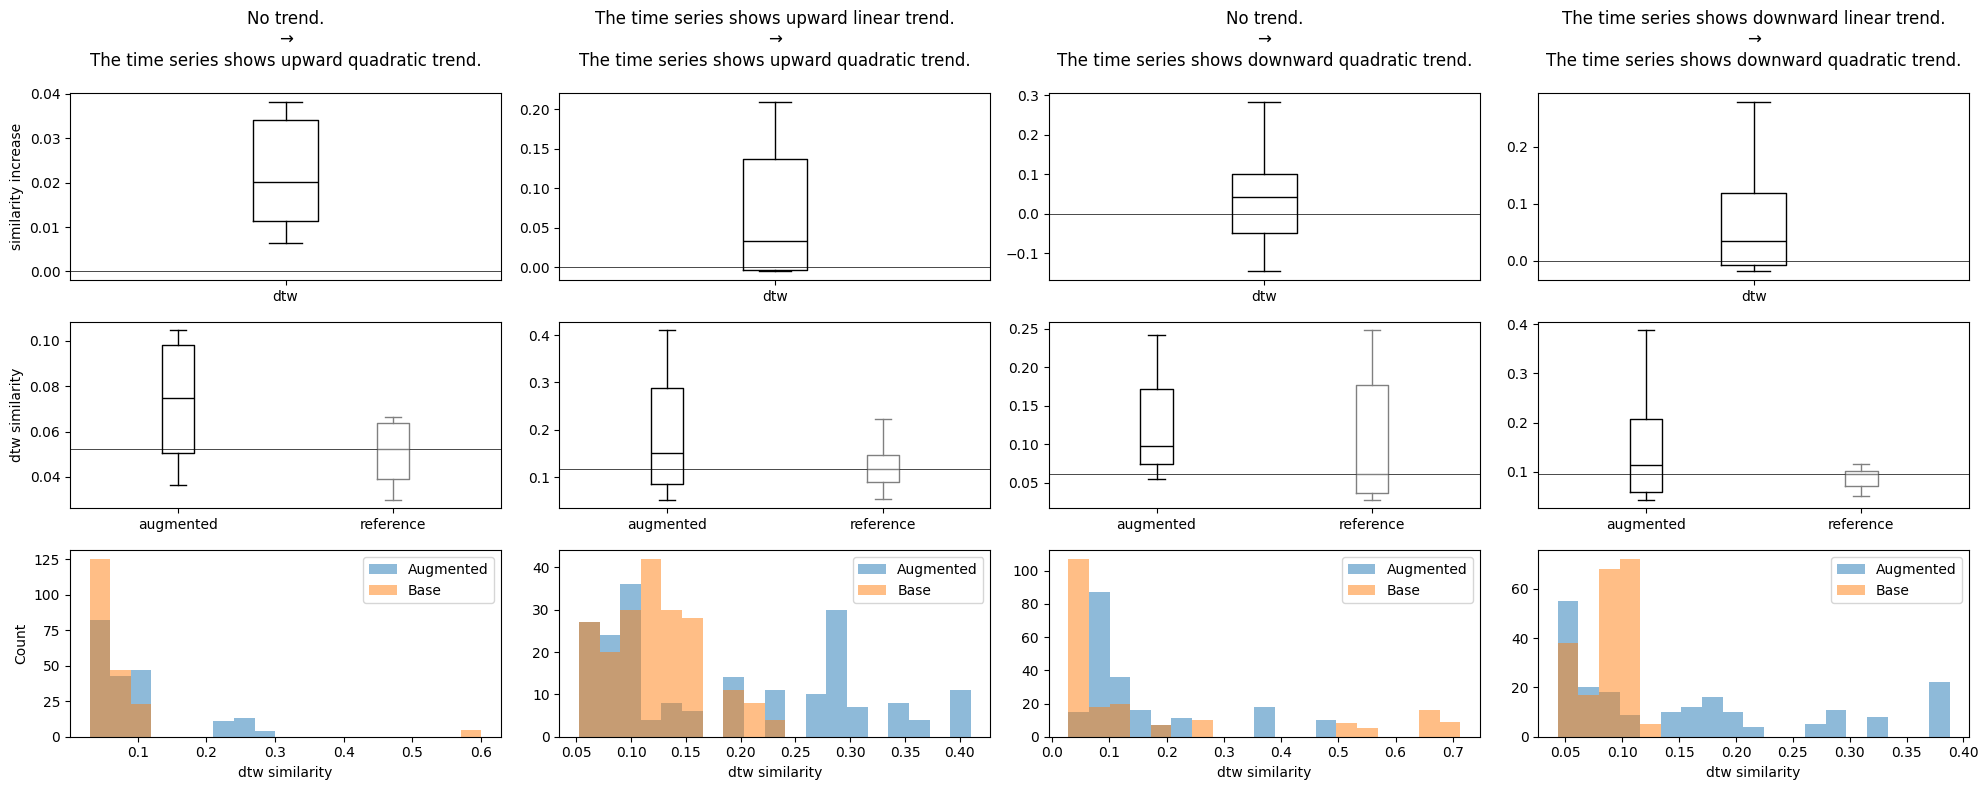

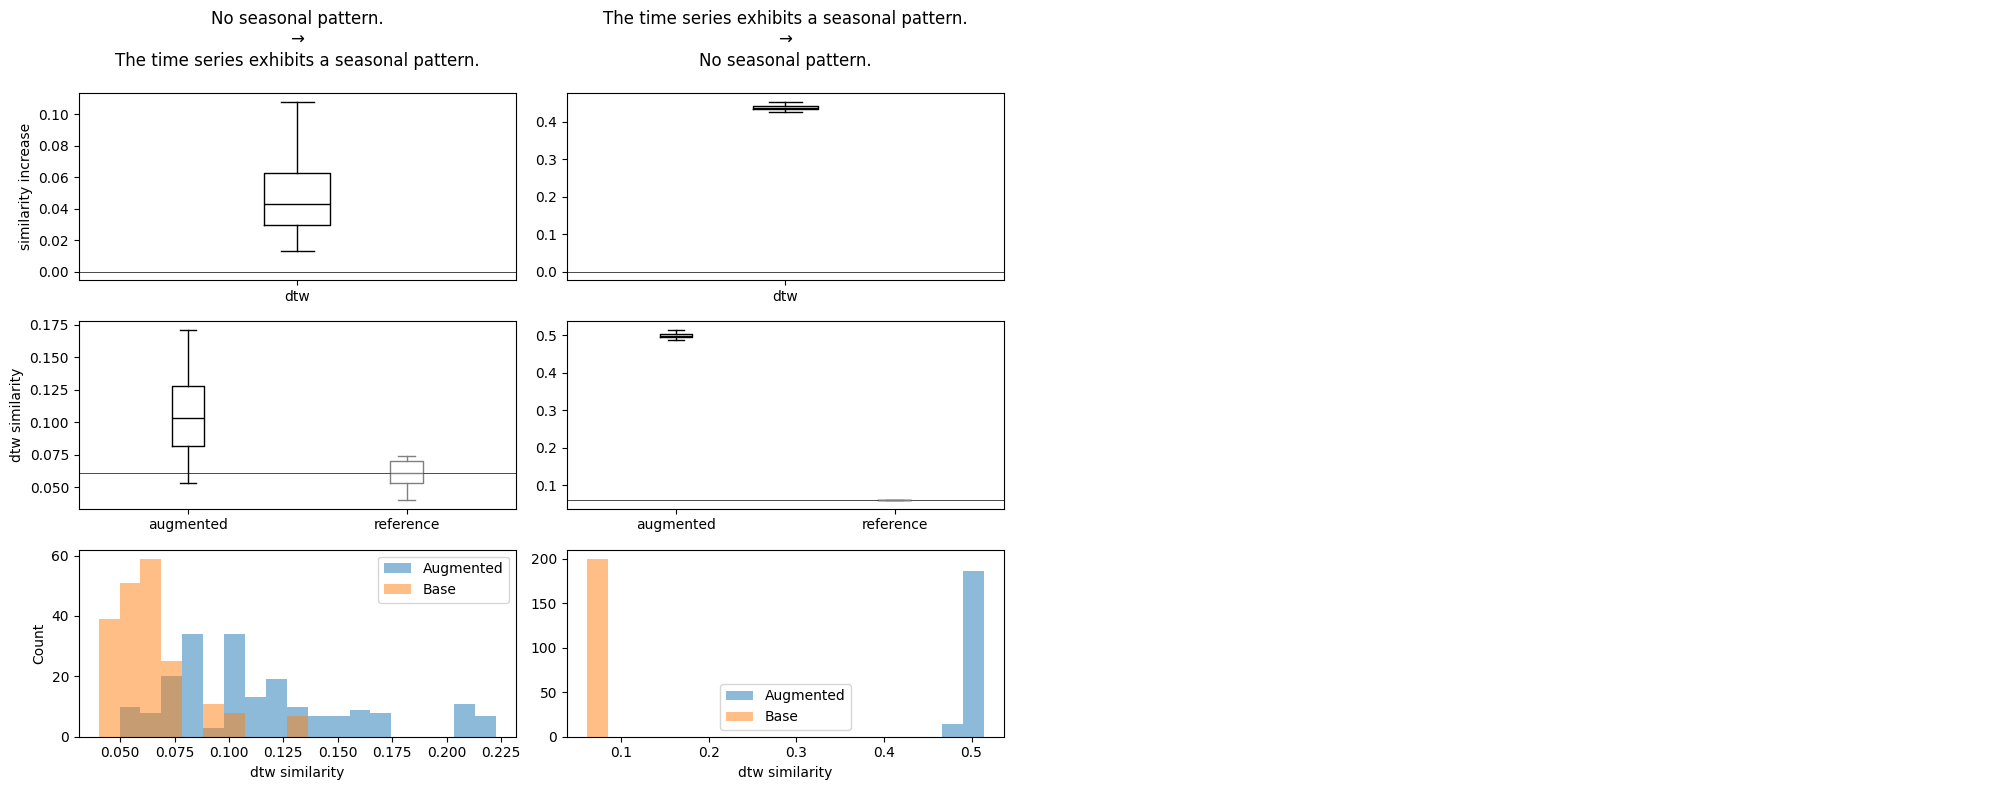

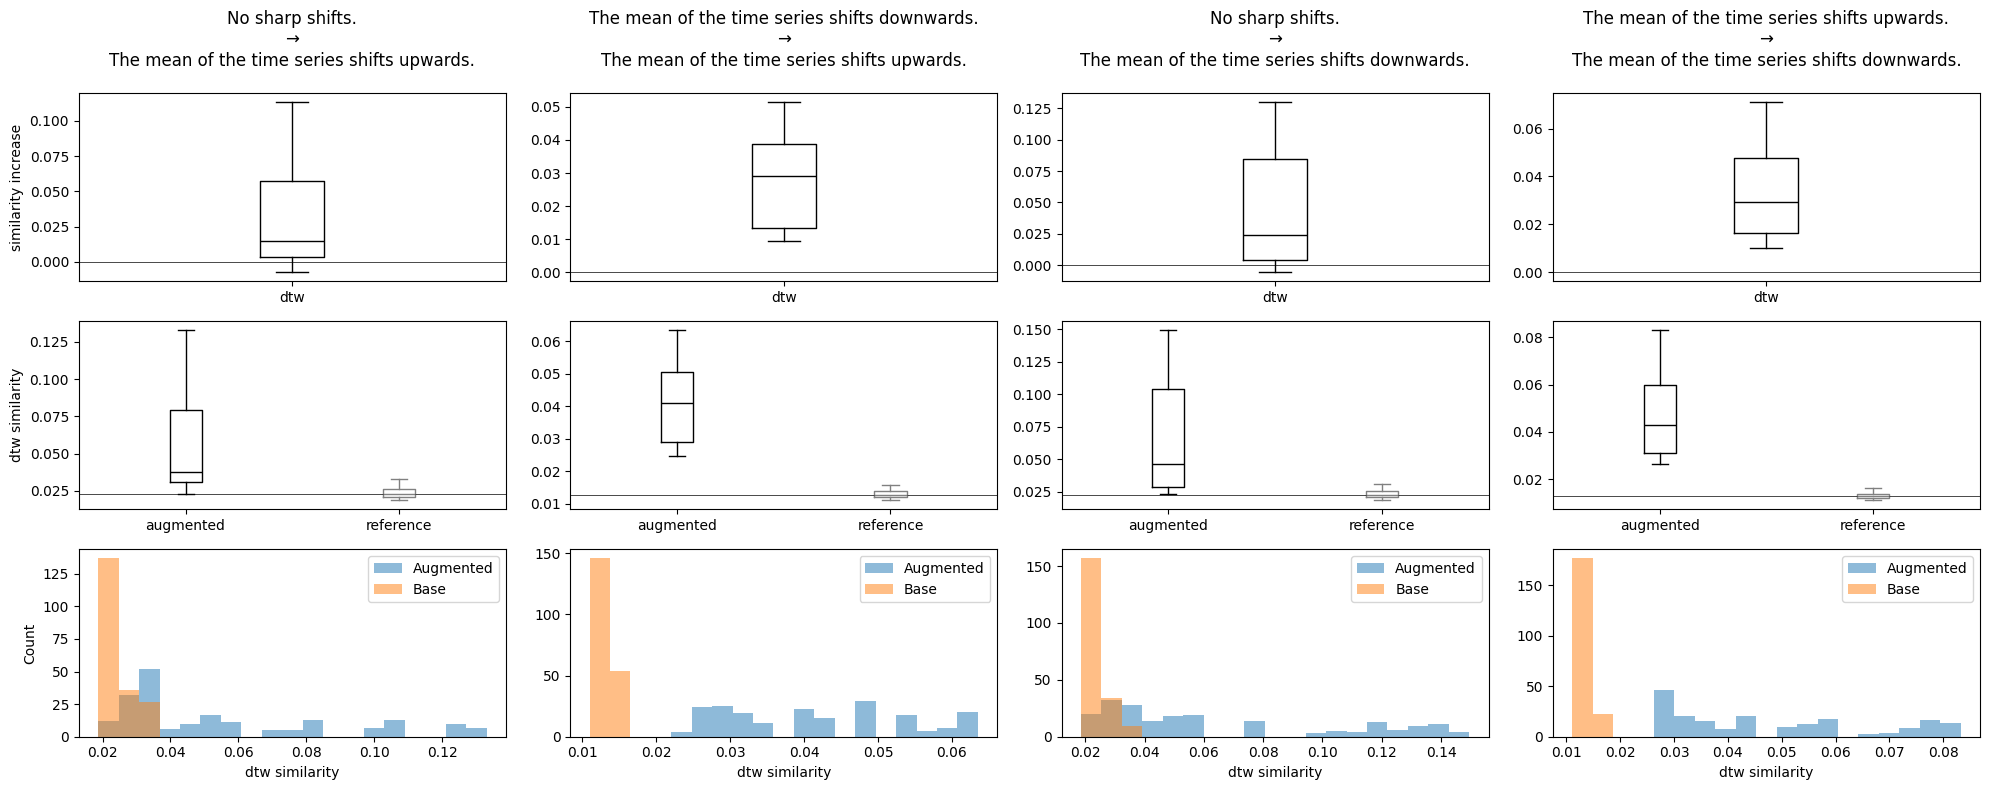

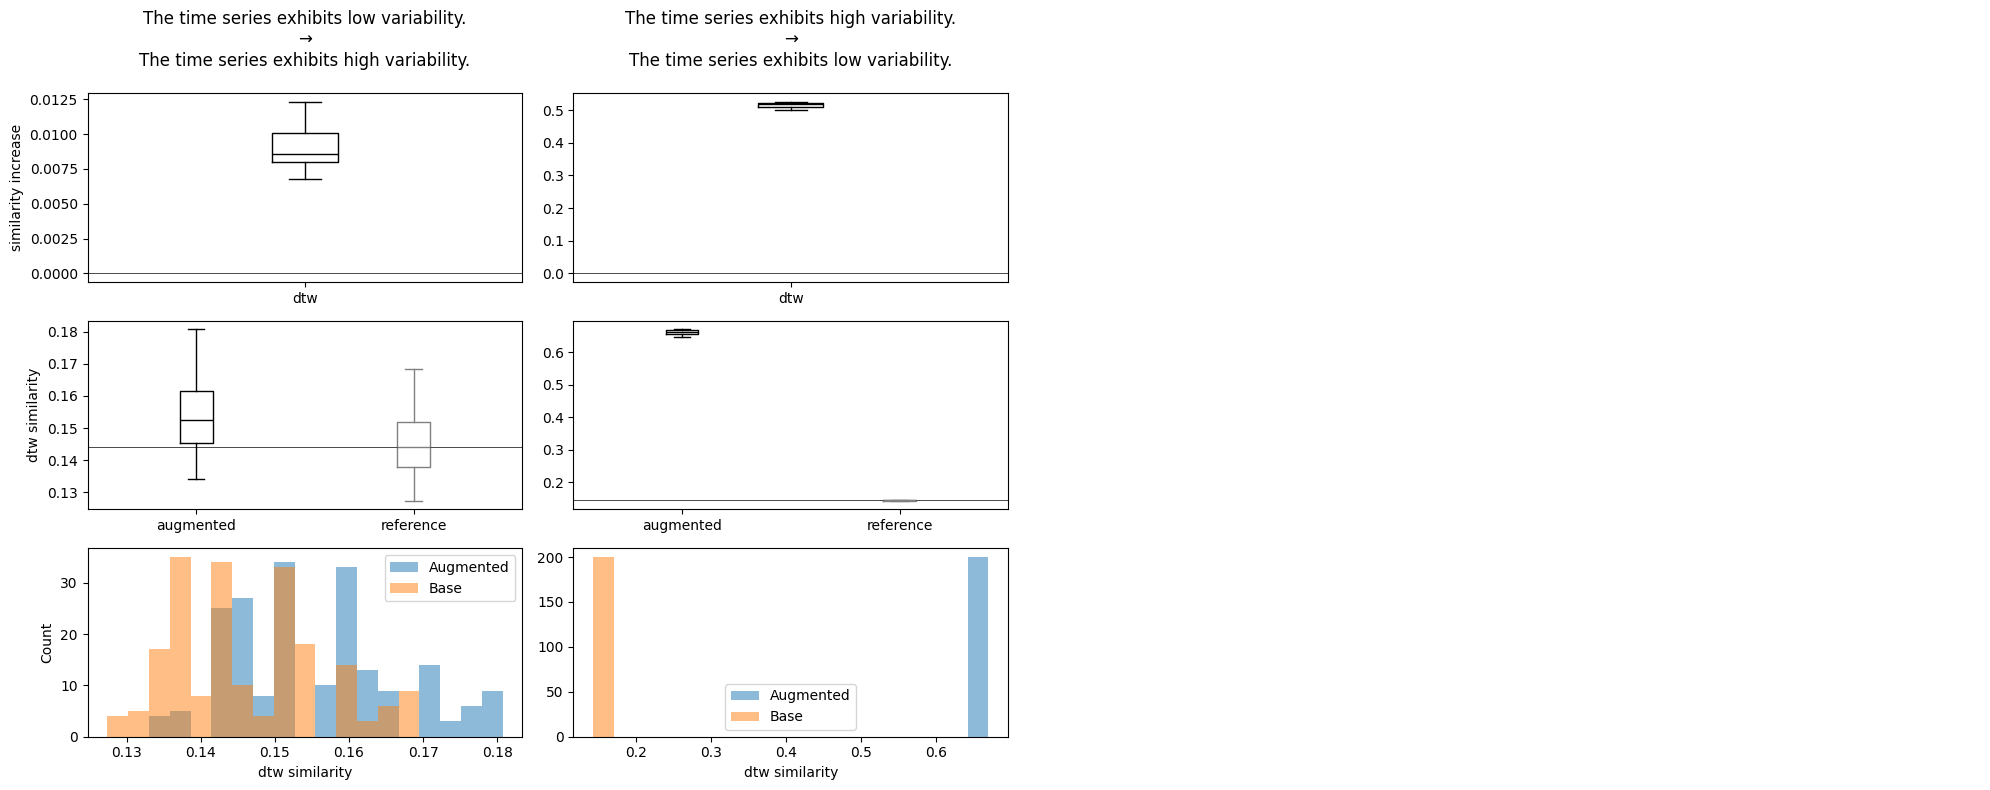

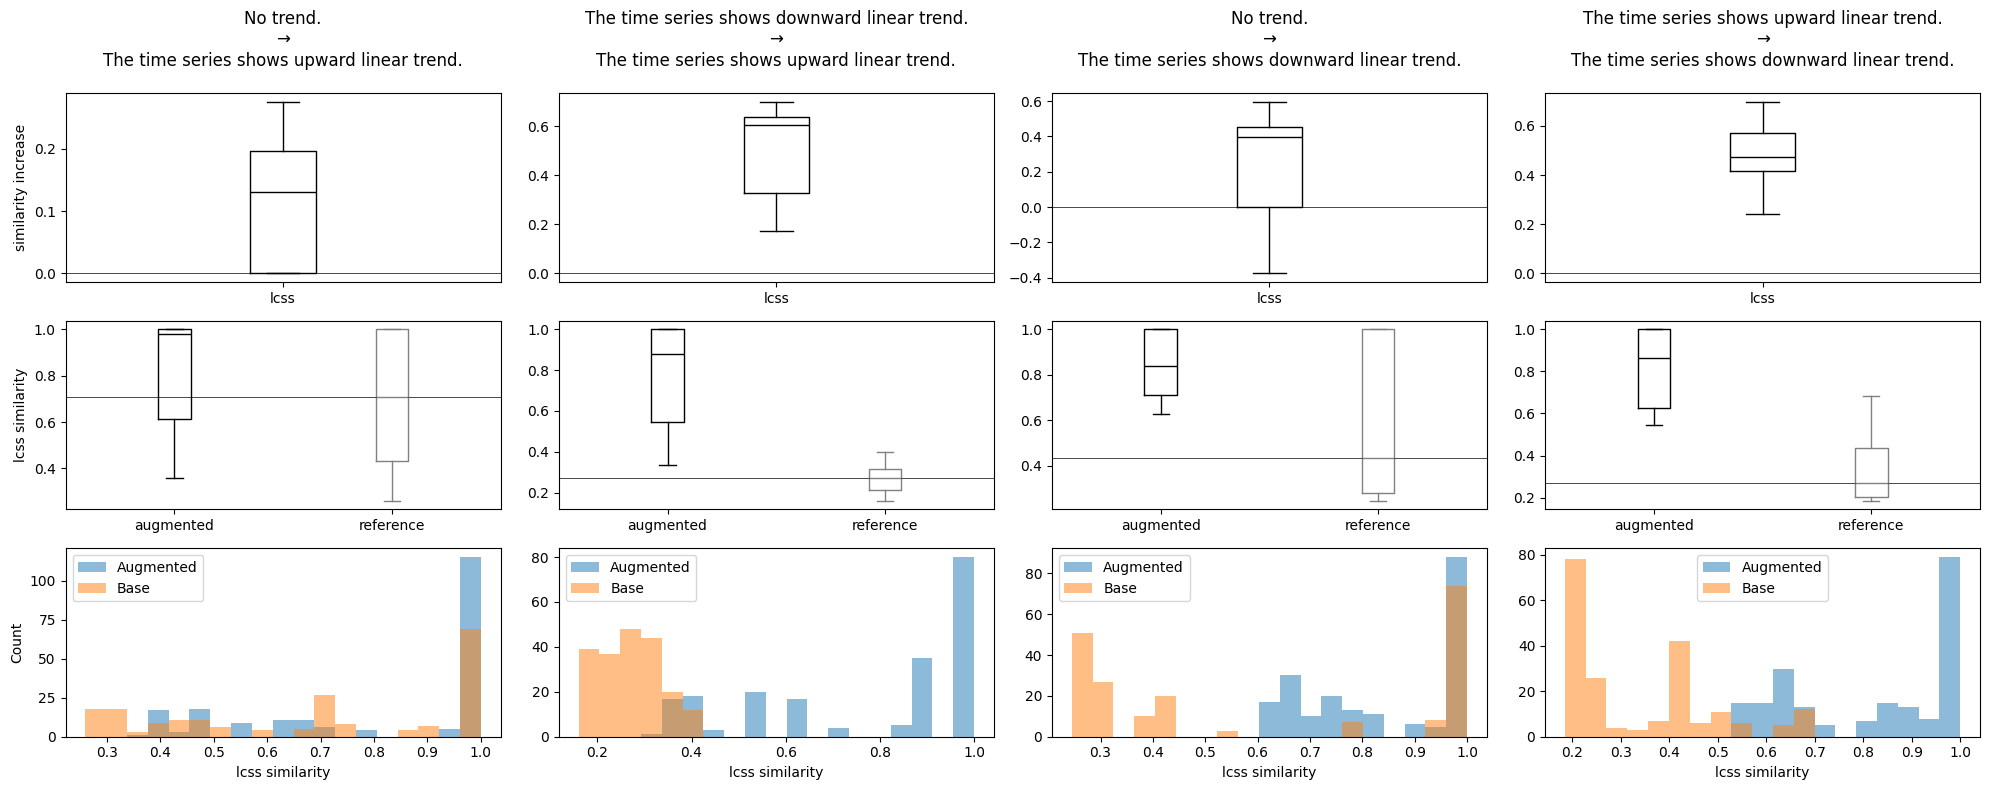

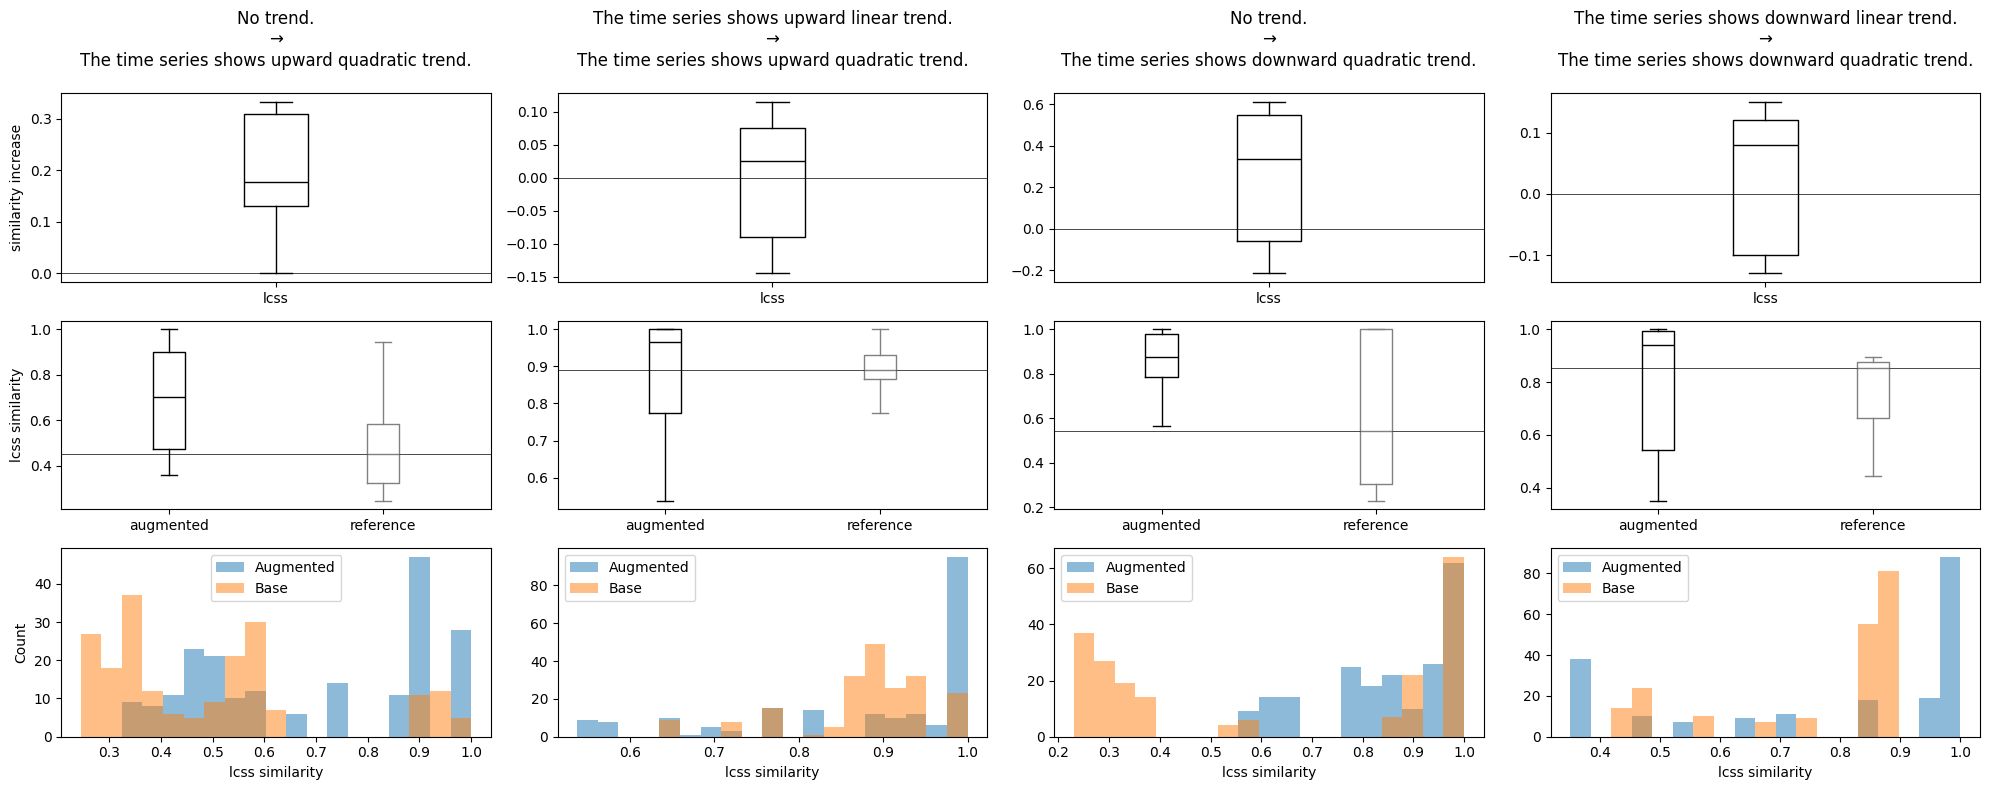

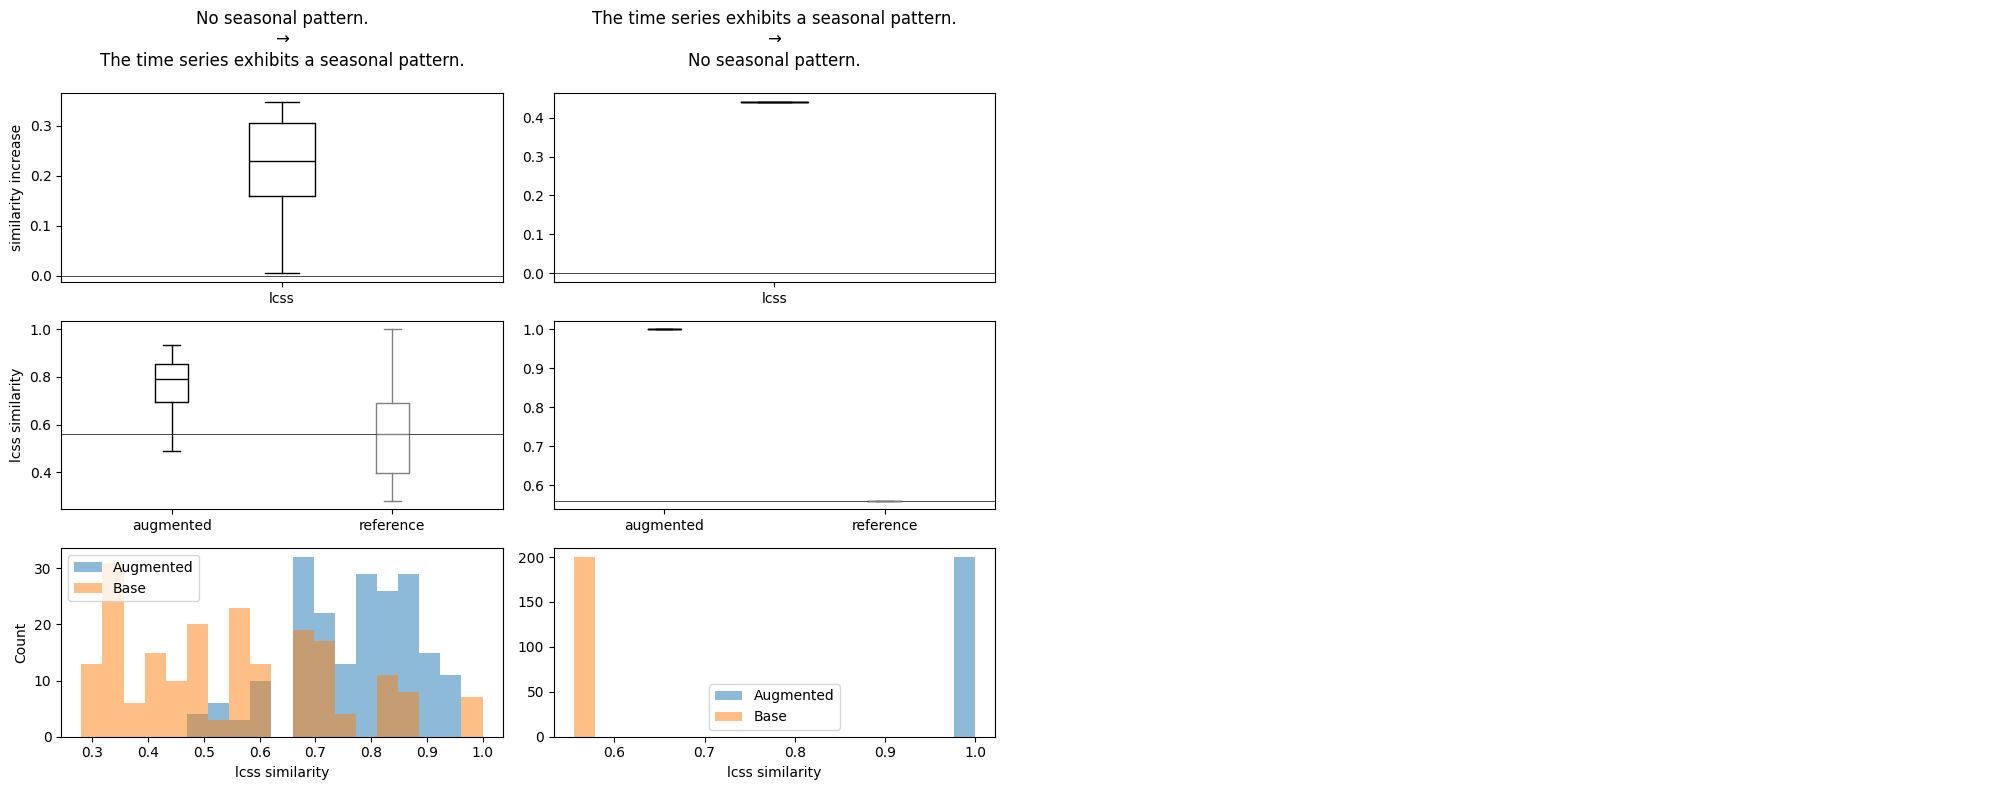

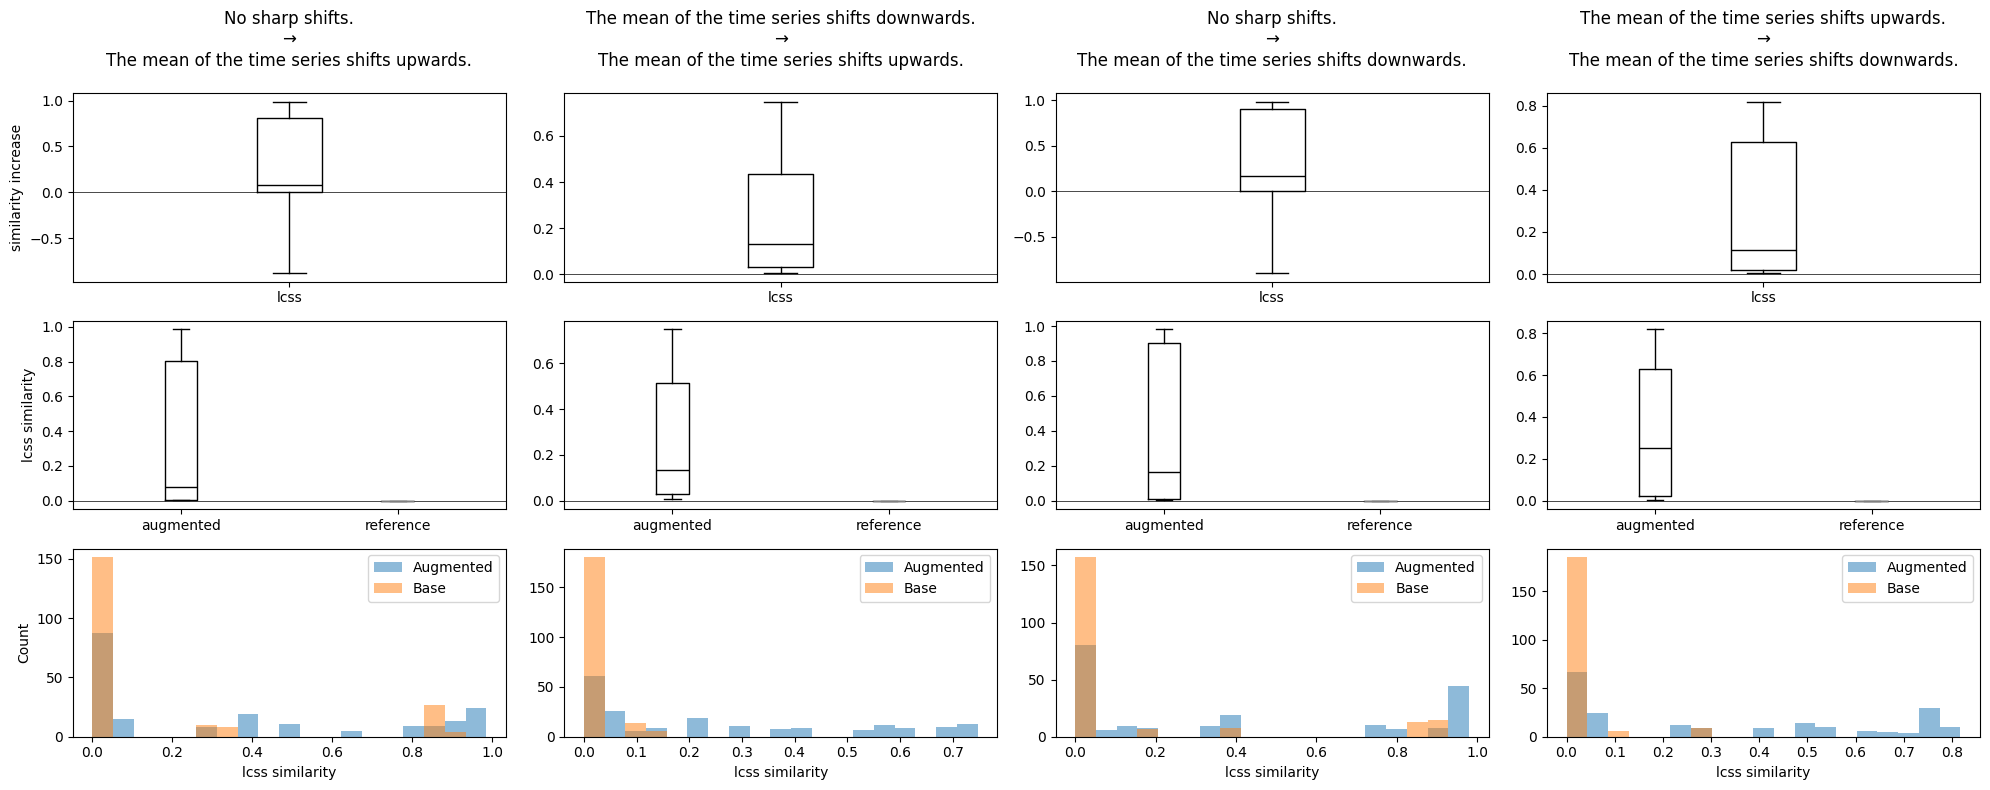

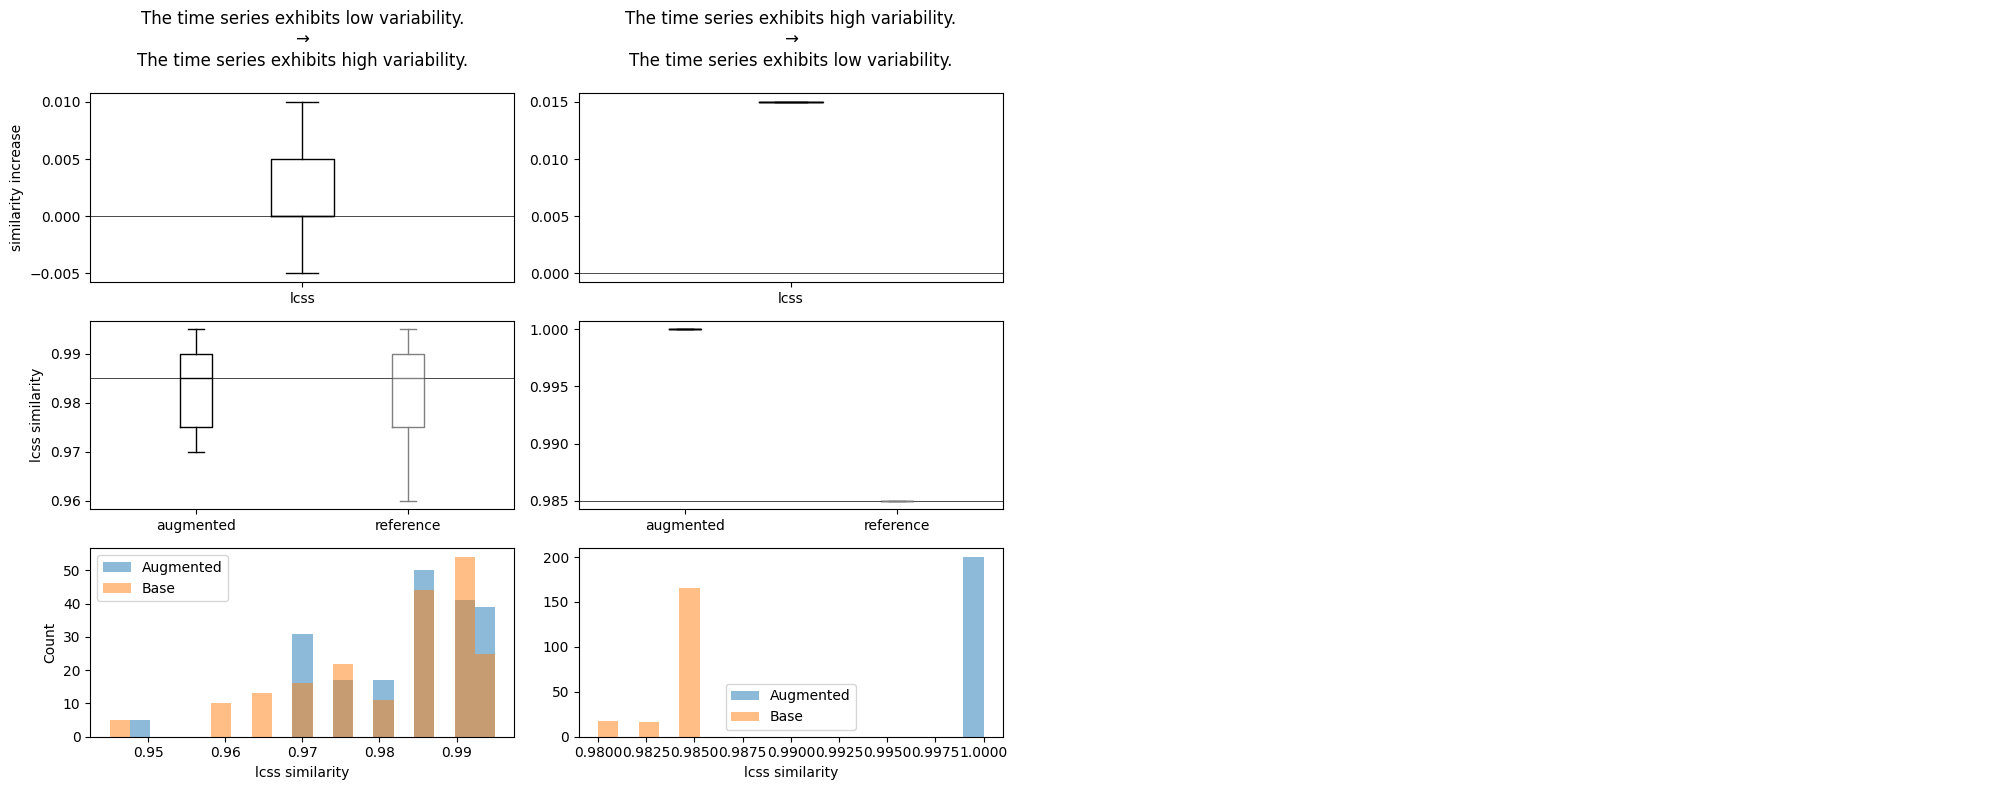

--------------------------------------------------------------------------------


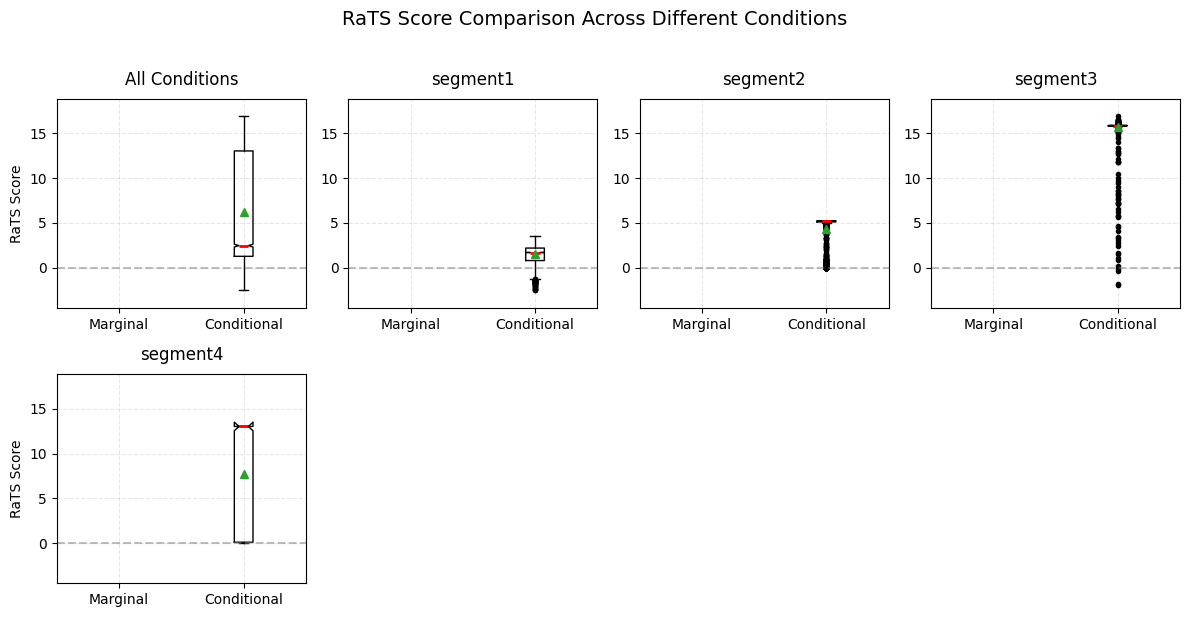

In [15]:
w = 0.6
with open('run/eval.py', 'r') as file:
    exec(file.read())
with open('run/eng_eval.py', 'r') as file:
    exec(file.read())

In [16]:
df_all = pd.concat([df_rats_all, df_dists_all, df_pw_dists_all], ignore_index=True).dropna(subset=['score'])
summarize_scores(df_all)

metric        Point-wise MSE ↓   Point-wise MAE ↓  \
final_score  3.15 [1.37, 7.36]  1.41 [0.86, 2.14]   

metric      DTW similarity improvement ↑ LCSS similarity improvement ↑  \
final_score            0.04 [0.01, 0.12]             0.14 [0.01, 0.44]   

metric                   RaTS ↑  
final_score  2.47 [1.28, 13.02]